# Visualization

* We are looking for correlations between the independent variables and the target variable, the likelihood of being readmitted to the hospital, using graphs and plots. 
* This is also a good time to get a better understanding of patient demographics, their experiences at the hospital, medications being used / not used, and any diagnosed conditions.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

sns.set(style='darkgrid')
%matplotlib inline

### Import Dataset

In [2]:
data = pd.read_csv('diabetic_data_cleaned.csv', index_col=0)
df = data.copy()
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[10-20),3,59,0,18,0,0,0,...,No,No,No,Up,No,No,No,Ch,Yes,YES
1,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,...,No,No,No,No,No,No,No,No,Yes,NO
2,Caucasian,Male,[30-40),2,44,1,16,0,0,0,...,No,No,No,Up,No,No,No,Ch,Yes,NO
3,Caucasian,Male,[40-50),1,51,0,8,0,0,0,...,No,No,No,Steady,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[50-60),3,31,6,16,0,0,0,...,No,No,No,Steady,No,No,No,No,Yes,YES


In [3]:
features = pd.read_csv('features.csv',index_col='Unnamed: 0')
info = lambda attribute:print(f"{attribute.upper()} : {features[features['Feature']==attribute]['Description'].values[0]}\n")
features.head()

,Feature,Type,Description
0,encounter_id,Numeric,Unique identifier of an encounter
1,patient_nbr,Numeric,Unique identifier of a patient
2,race,Nominal,"Values: Caucasian, Asian, African American, Hi..."
3,gender,Nominal,"Values: male, female, and unknown/invalid"
4,age,Nominal,"Grouped in 10-year intervals: 0, 10), 10, 20),..."


In [4]:
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(df)

Data shape: (64395, 35)
___________________________
Data Types:
object    27
int64      8
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
A1Cresult,object,64395,4,0,>7,Norm
acarbose,object,64395,3,0,No,Up
age,object,64395,10,0,[0-10),[90-100)
change,object,64395,2,0,Ch,No
chlorpropamide,object,64395,4,0,Down,Up
diabetesMed,object,64395,2,0,No,Yes
diag_1,object,64395,9,0,Circulatory,Respiratory
gender,object,64395,2,0,Female,Male
glimepiride,object,64395,4,0,Down,Up
glipizide,object,64395,4,0,Down,Up


In [5]:
round(df.describe(), 2)

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,64395.00,64395.00,64395.00,64395.00,64395.00,64395.00,64395.00,64395.00
mean,4.14,42.53,1.39,15.11,0.17,0.06,0.12,7.23
std,2.77,19.84,1.72,7.20,0.54,0.23,0.39,1.97
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,2.00
25%,2.00,30.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,3.00,44.00,1.00,14.00,0.00,0.00,0.00,8.00
75%,6.00,57.00,2.00,19.00,0.00,0.00,0.00,9.00
max,13.00,103.00,6.00,40.00,3.00,1.00,2.00,9.00


In [6]:
df.shape

(64395, 35)

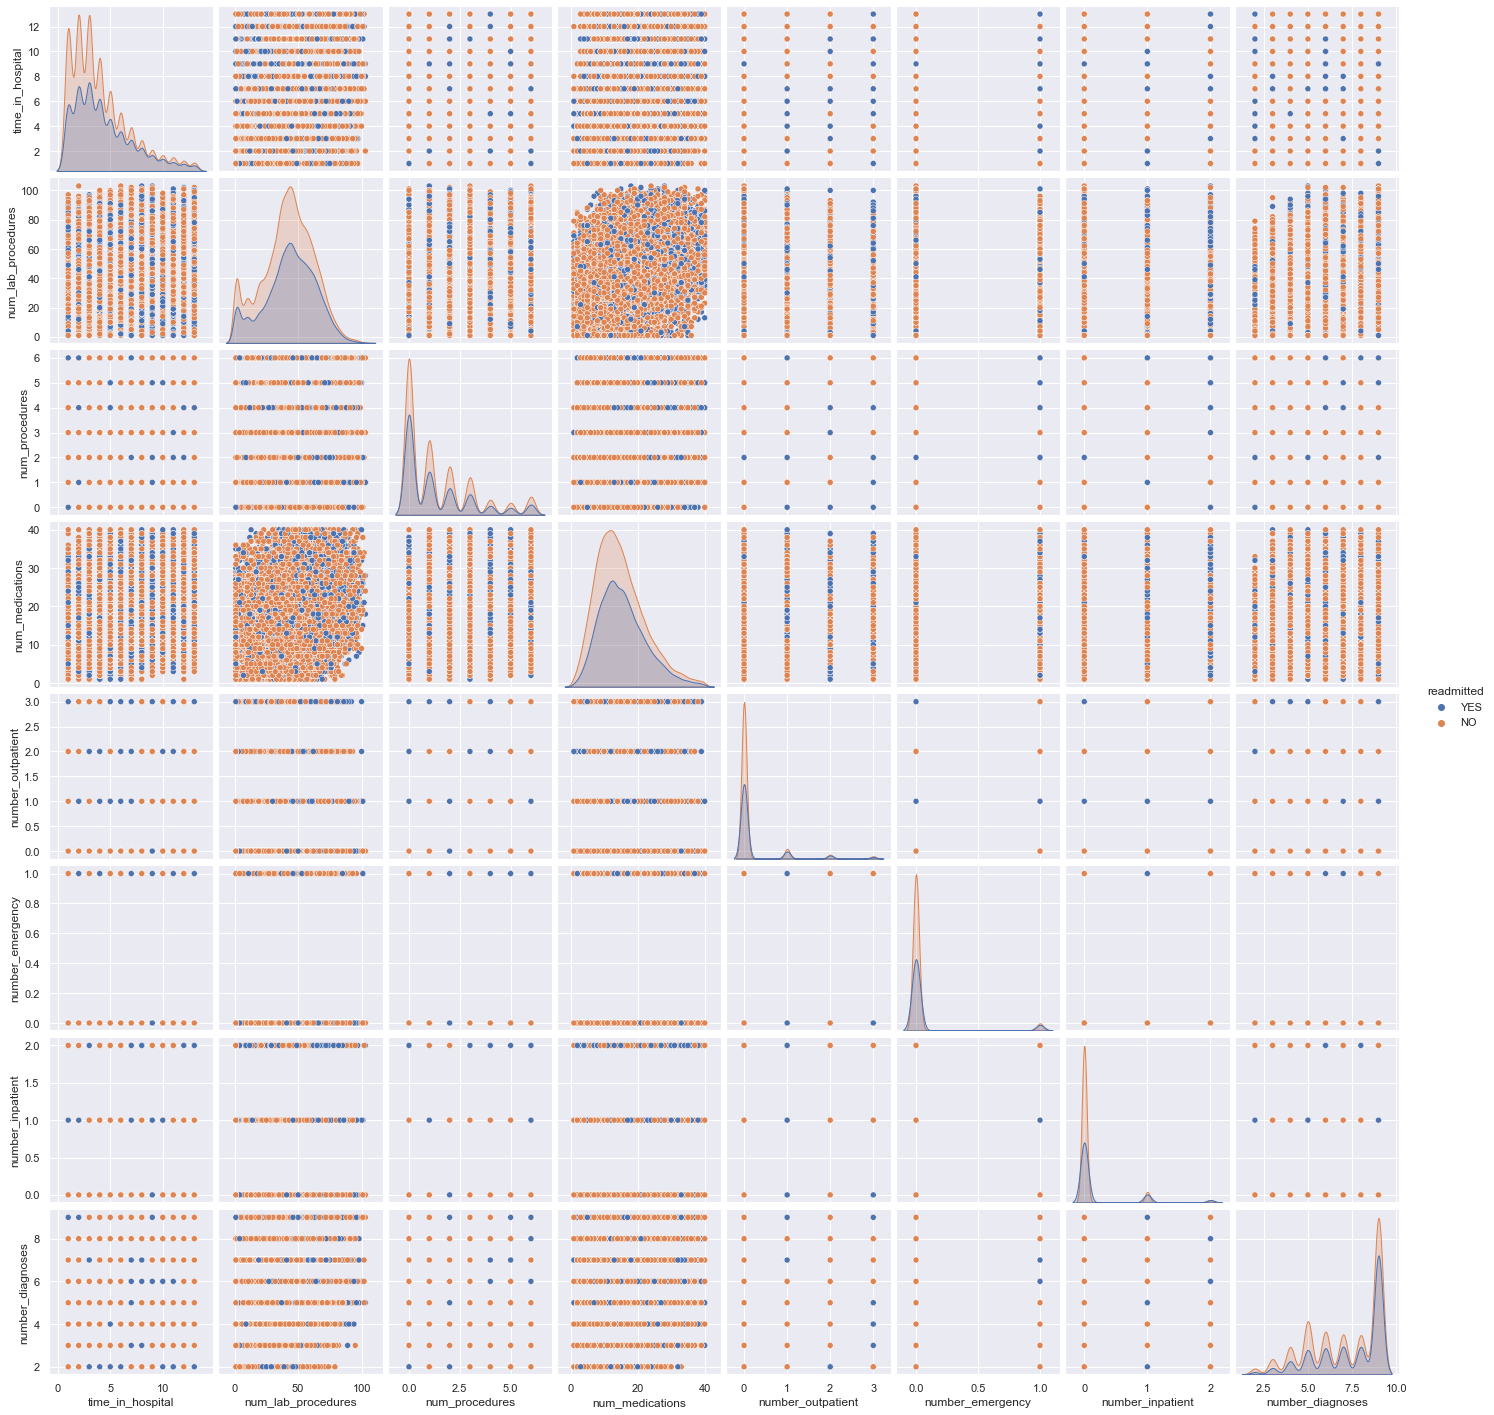

In [7]:
sns.pairplot(df, hue='readmitted');

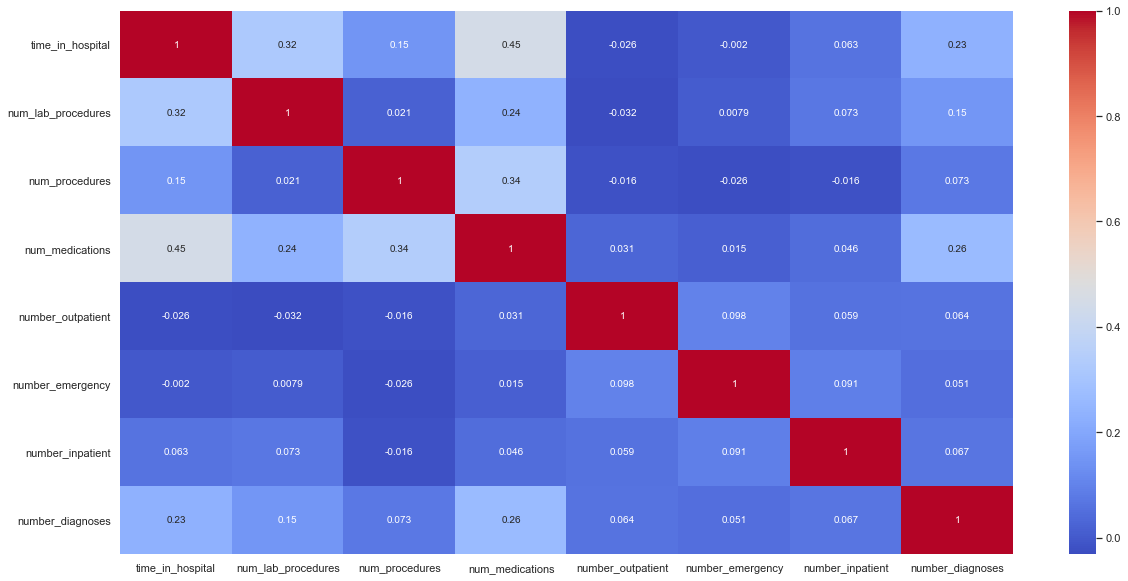

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

### FOCUS ON "readmitted" patients overall

In [9]:
info('readmitted')

READMITTED : Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.



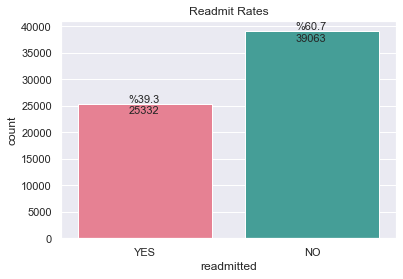

In [10]:
def labels(ax):
    for p in ax.patches:
            ax.annotate('%{:.1f}\n{:.0f}'.format(100*p.get_height()/len(df),p.get_height()), 
                        (p.get_x()+0.3, p.get_height()-1900),size=11)

ax = sns.countplot(x='readmitted', palette='husl', data=df)
labels(ax)

# sns.catplot(x='readmitted', kind='count', palette='husl', data=df)  # alternative
plt.title('Readmit Rates')
plt.show()

### FOCUS ON "race"

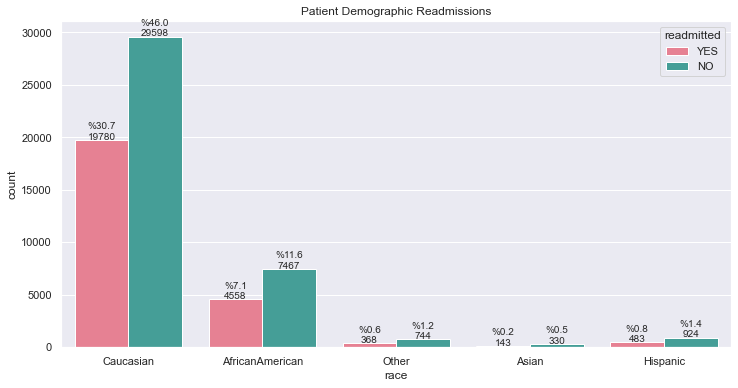

In [11]:
def labels(ax):
    for bar in ax.patches: 
        ax.annotate('%{:.1f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                       size=10, xytext=(0, 8), 
                       textcoords='offset points') 

rcParams['figure.figsize'] = 12,6
ax = sns.countplot(x='race', hue='readmitted', palette='husl', data=df)
labels(ax)
# sns.catplot(x='race', hue='readmitted', kind='count', palette='husl', data=df, aspect=2, legend_out=False)
plt.title('Patient Demographic Readmissions')
plt.show()

In [12]:
pd.crosstab(df.race, df.readmitted, margins=True, margins_name='Total')

readmitted,NO,YES,Total
race,,,
AfricanAmerican,7467,4558,12025
Asian,330,143,473
Caucasian,29598,19780,49378
Hispanic,924,483,1407
Other,744,368,1112
Total,39063,25332,64395


### FOCUS ON "gender"

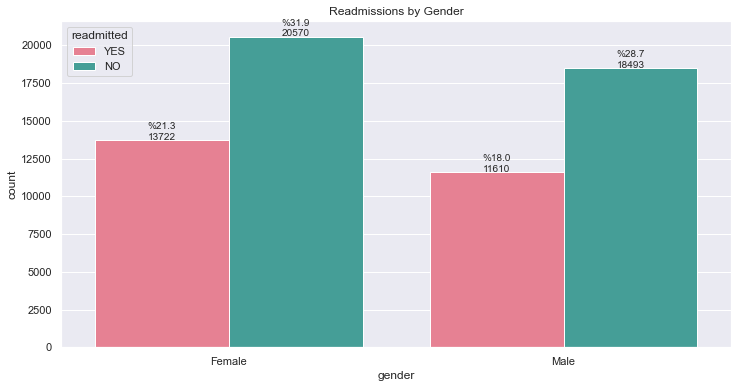

In [13]:
rcParams['figure.figsize'] = 12,6
ax = sns.countplot(x='gender', hue='readmitted', palette='husl', data=df)
labels(ax)
plt.title('Readmissions by Gender')
plt.show()

In [14]:
pd.crosstab(df.gender, df.readmitted, margins=True, margins_name='Total')

readmitted,NO,YES,Total
gender,,,
Female,20570,13722,34292
Male,18493,11610,30103
Total,39063,25332,64395


### FOCUS ON "age" groups

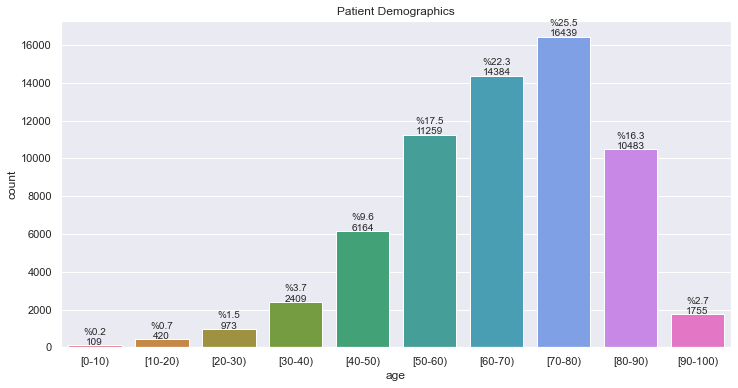

In [15]:
ax = sns.countplot(x='age', palette='husl', data=df.sort_values('age'))
labels(ax)
plt.title('Patient Demographics')
plt.show()

> It looks like most patients are older, 50+ years old, though there aren't many patients over 90.

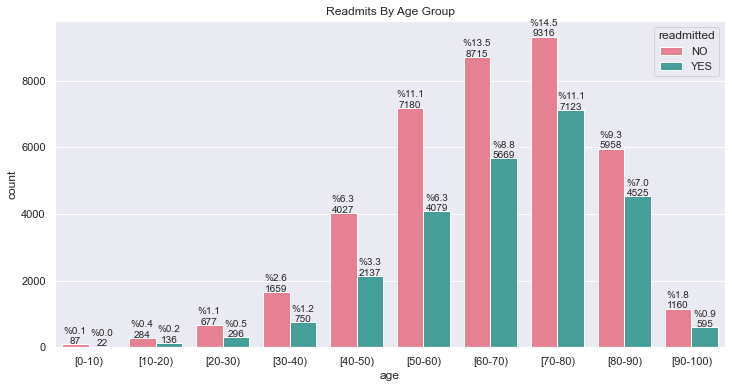

In [16]:
ax = sns.countplot(x='age', hue='readmitted', palette='husl', data=df.sort_values('age'))
labels(ax)
plt.title('Readmits By Age Group')
plt.show()

In [17]:
pd.crosstab(df.age, df.readmitted, margins=True, margins_name='Total').T

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100),Total
readmitted,,,,,,,,,,,
NO,87,284,677,1659,4027,7180,8715,9316,5958,1160,39063
YES,22,136,296,750,2137,4079,5669,7123,4525,595,25332
Total,109,420,973,2409,6164,11259,14384,16439,10483,1755,64395


>In every age group, more patients are not readmitted. The 70-80 age group account has the highest number of readmitted and not readmitted patients.

### FOCUS ON "time_in_hospital"

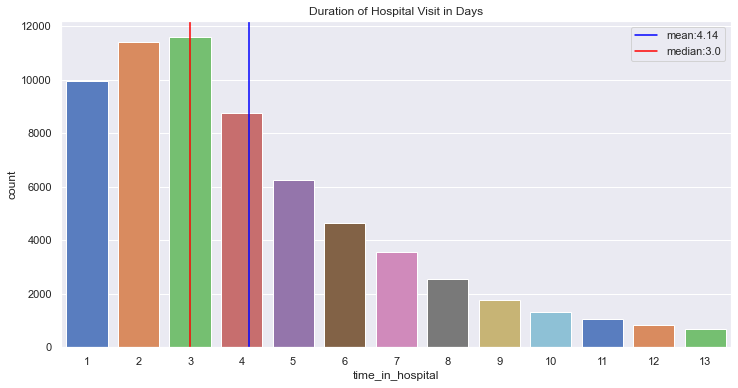

In [18]:
sns.countplot(x='time_in_hospital', palette='muted', data=df)
mean, median = np.mean(df.time_in_hospital), np.median(df.time_in_hospital)
plt.axvline(mean-df.time_in_hospital.min(), color='blue', label=f'mean:{round(mean,2)}')
plt.axvline(median-df.time_in_hospital.min(), color='red', label=f'median:{round(median,2)}')
plt.title('Duration of Hospital Visit in Days')
plt.legend()
plt.show()

> **Does the amount of time spent in the hospital impact a patient's chances of readmission?**

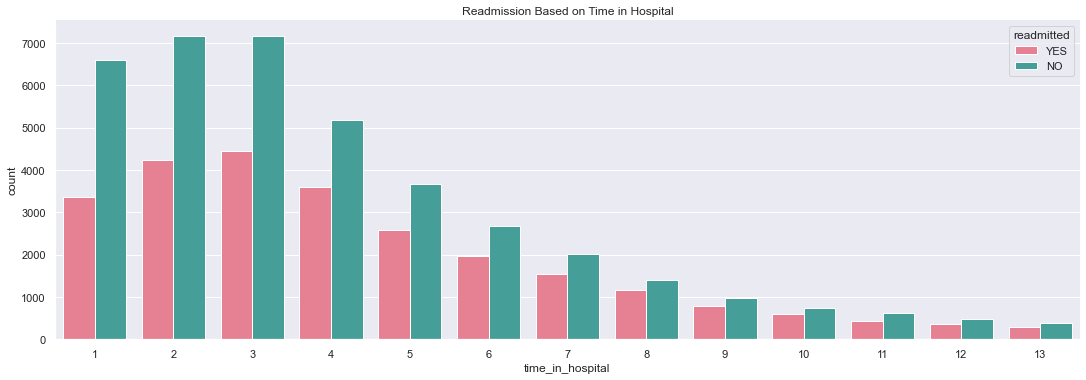

In [19]:
sns.catplot(x='time_in_hospital', hue='readmitted', kind='count', palette='husl', aspect=3, data=df, legend_out=False)
plt.title('Readmission Based on Time in Hospital')
plt.show()

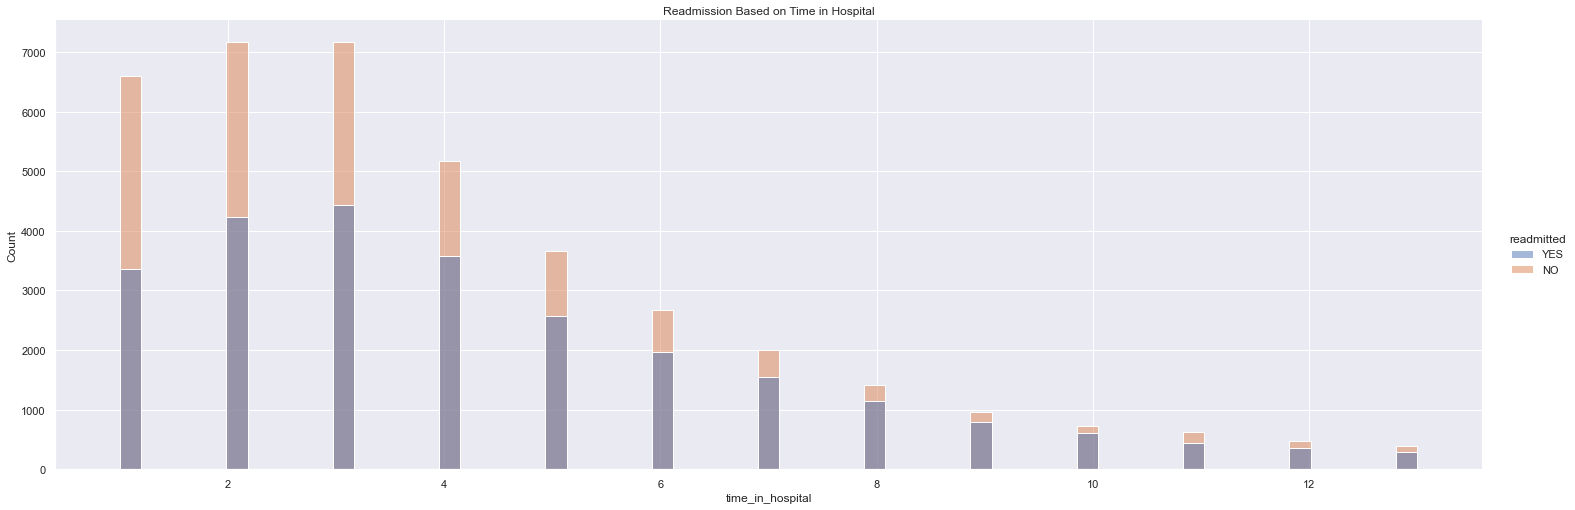

In [20]:
sns.displot(x='time_in_hospital', hue='readmitted', data=df, height=7, aspect=3)
plt.title('Readmission Based on Time in Hospital')
plt.show()

> Based on the graph, the longer a patient spends in the hospital, the likelier their chances are of being readmitted. Patients who spend more than a week in the hospital usually have a serious illness or complication that may reoccur depending on their ability to recover, which is why they may need to revisit the hospital.

> **Which age group is spending the most time in hospitals during visits?**

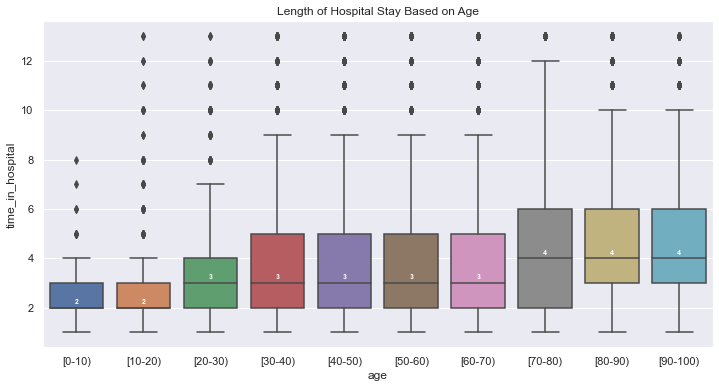

In [21]:
def box_labels(ax, df,col1,col2):
    medians = df.groupby([col1])[col2].median()
    vertical_offset = df[col2].median() * 0.05 # offset from median for display

    for xtick in ax.get_xticks():
        ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                horizontalalignment='center',size='x-small',color='w',weight='semibold')

ax = sns.boxplot(x='age', y='time_in_hospital', data=df.sort_values('age'))
box_labels(ax, df.sort_values('age'),'age','time_in_hospital')    
plt.title('Length of Hospital Stay Based on Age')
plt.show()

> **What is the comparison of time in hospital for readmitted patients?**

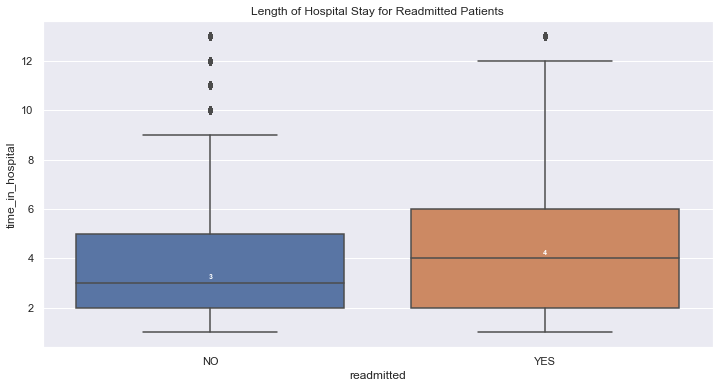

In [22]:
ax = sns.boxplot(x='readmitted', y='time_in_hospital', data=df.sort_values('readmitted'))
box_labels(ax, df.sort_values('readmitted'),'readmitted','time_in_hospital') 
plt.title('Length of Hospital Stay for Readmitted Patients')
plt.show()

> Readmitted patients stay longer in the hospital on average compared to those who are not readmitted.

### FOCUS ON "number of lab procedures`

In [13]:
info("num_lab_procedures")

NUM_LAB_PROCEDURES : Number of lab tests performed during the encounter



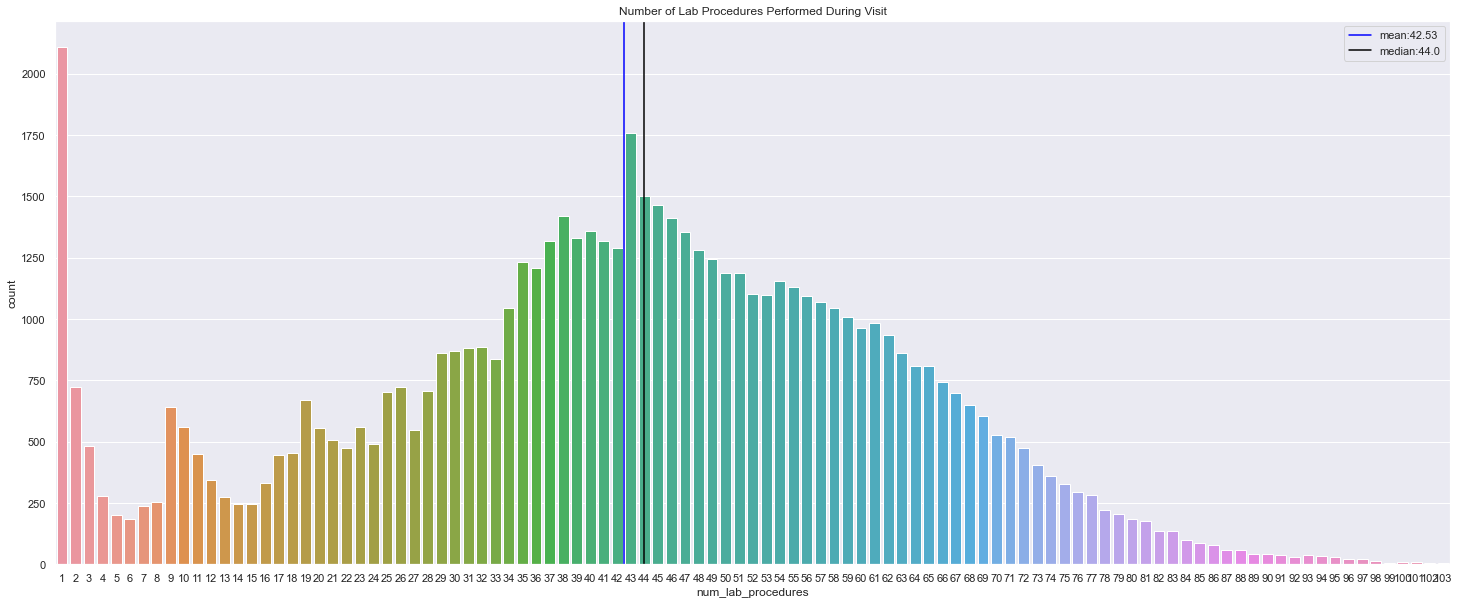

In [23]:
rcParams['figure.figsize'] = 25,10
sns.countplot(x='num_lab_procedures', data=df)
mean, median = np.mean(df.num_lab_procedures), np.median(df.num_lab_procedures)
plt.axvline(mean-df.num_lab_procedures.min(), color='blue', label=f'mean:{round(mean,2)}')
plt.axvline(median-df.num_lab_procedures.min(), color='black', label=f'median:{round(median,2)}')
plt.title('Number of Lab Procedures Performed During Visit')
plt.legend()
plt.show()

In [24]:
df.groupby('readmitted')['num_lab_procedures'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39063.0,41.87,19.85,1.0,30.0,43.0,56.0,103.0
YES,25332.0,43.56,19.78,1.0,32.0,45.0,58.0,103.0


> **Do the patients with longer hospital stays have more lab tests?**

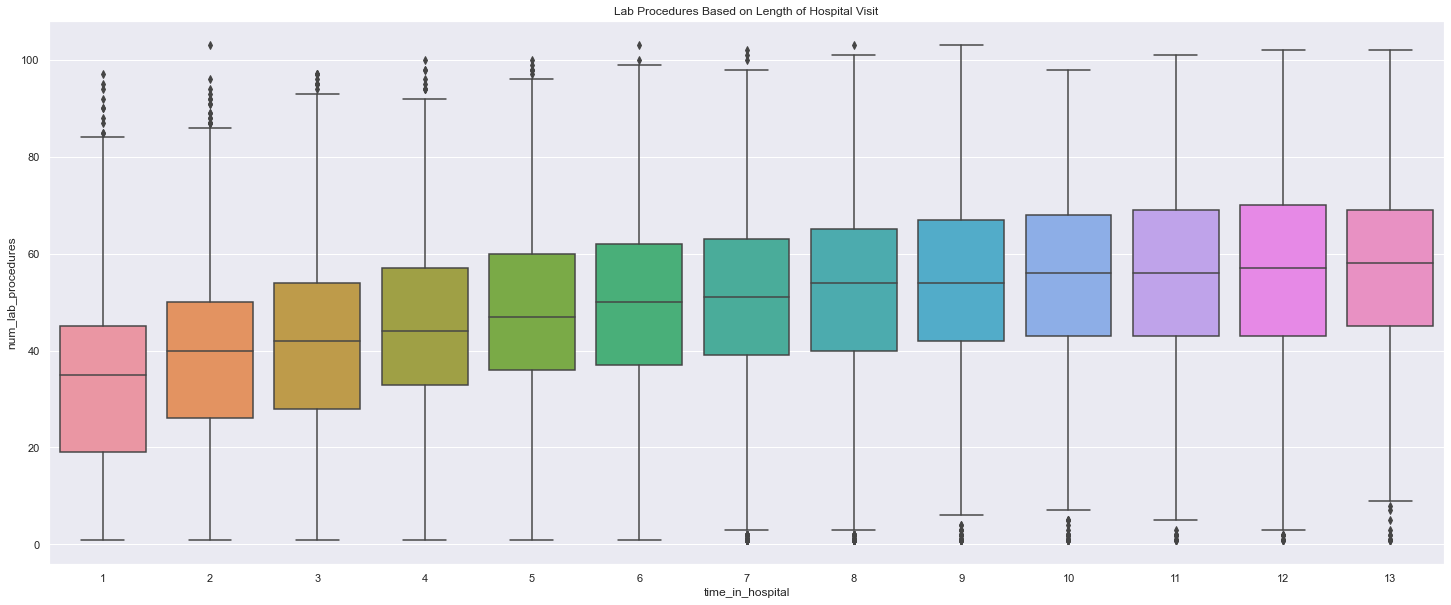

In [25]:
def box_labels(ax, df,col1,col2):
    medians = df.groupby([col1])[col2].median()
    vertical_offset = df[col2].median() * 0.05 # offset from median for display

    for xtick in ax.get_xticks():
        ax.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
                horizontalalignment='center',size=12,color='w',weight='semibold')

ax = sns.boxplot(x='time_in_hospital', y='num_lab_procedures', data=df.sort_values('time_in_hospital'))
# box_labels(ax, df.sort_values('time_in_hospital'),'time_in_hospital','num_lab_procedures') 
plt.title('Lab Procedures Based on Length of Hospital Visit')
plt.show()

* There is a positive correlation between time spent in the hospital and number of lab tests completed. 
* This makes sense since patients with longer stays had more tests completed to properly diagnose their conditions.

> **Do readmitted patients have more lab tests?**

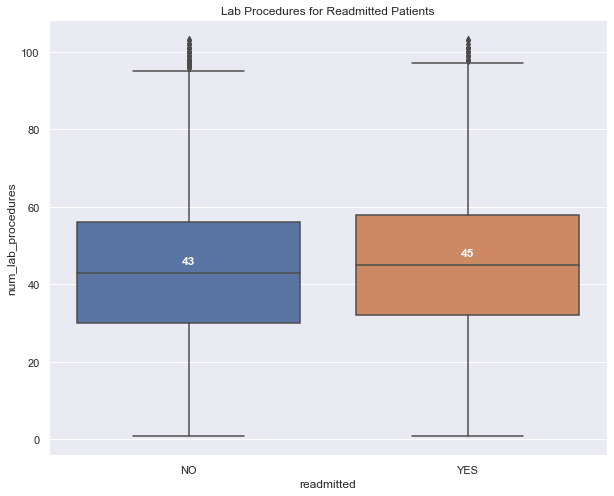

In [26]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='readmitted', y='num_lab_procedures', data=df.sort_values('readmitted'))
box_labels(ax, df.sort_values('readmitted'),'readmitted','num_lab_procedures') 
plt.title('Lab Procedures for Readmitted Patients')
plt.show()

* The average number of lab procedures is about equal for readmitted and not readmitted patients. 
* Not readmitted patients have a slightly lower number of lab procedures done during their visit.

### FOCUS ON "`number of procedures`" (other than lab)

In [27]:
info('num_procedures')

NUM_PROCEDURES : Number of procedures (other than lab tests) performed during the encounter



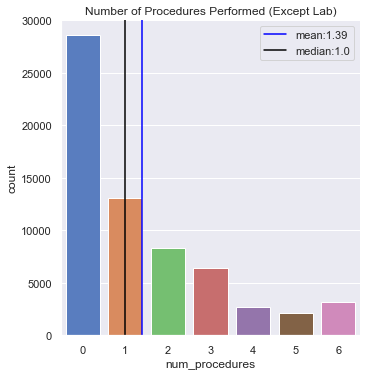

In [28]:
sns.catplot(x='num_procedures', kind='count', palette='muted', data=df)
mean, median = np.mean(df.num_procedures), np.median(df.num_procedures)
plt.axvline(mean, color='blue', label=f'mean:{round(mean,2)}')
plt.axvline(median, color='black', label=f'median:{round(median,2)}')
plt.title('Number of Procedures Performed (Except Lab)')
plt.legend()
plt.show()

> **Do the number of tests performed indicate whether a patient will be readmitted?**

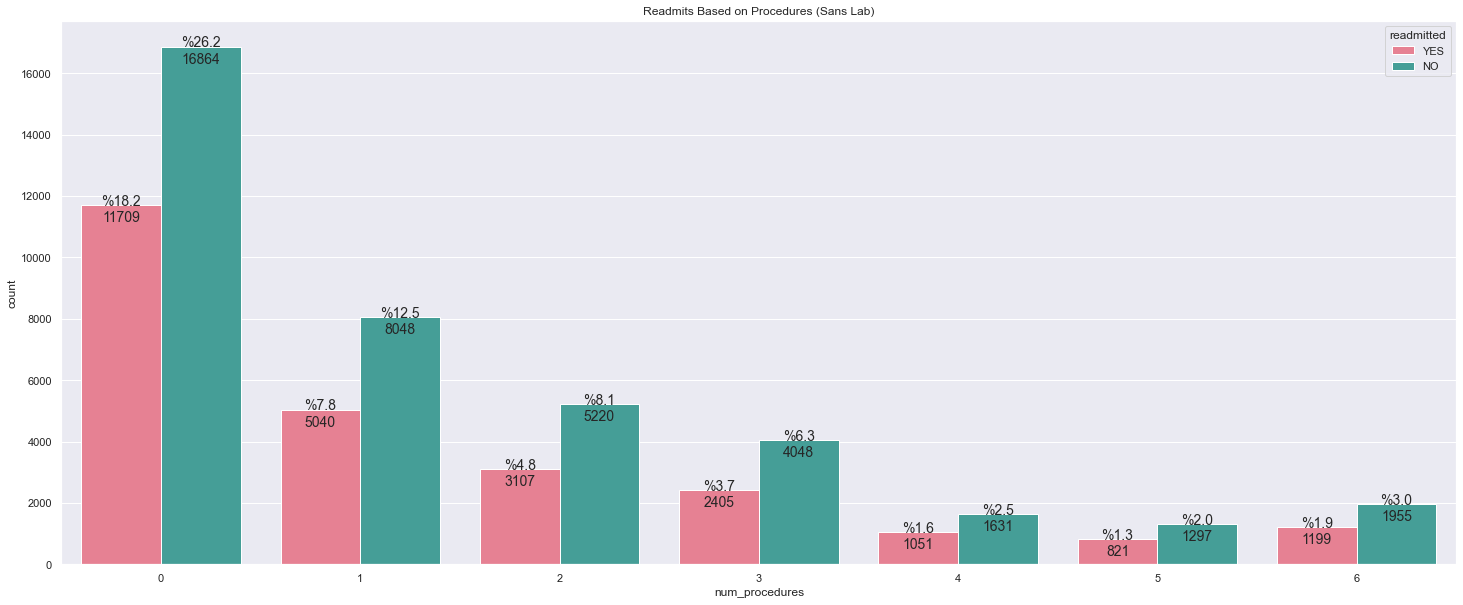

In [29]:
def labels(ax):
    for bar in ax.patches: 
        ax.annotate('%{:.1f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()-400), ha='center', va='center', 
                       size=14, xytext=(0, 8), 
                       textcoords='offset points') 
        
ax = sns.countplot(x='num_procedures', hue='readmitted', palette='husl', data=df)
labels(ax)
plt.title('Readmits Based on Procedures (Sans Lab)')
plt.show()

### FOCUS ON "number of medications"

In [30]:
info('num_medications')

NUM_MEDICATIONS : Number of distinct generic names administered during the encounter



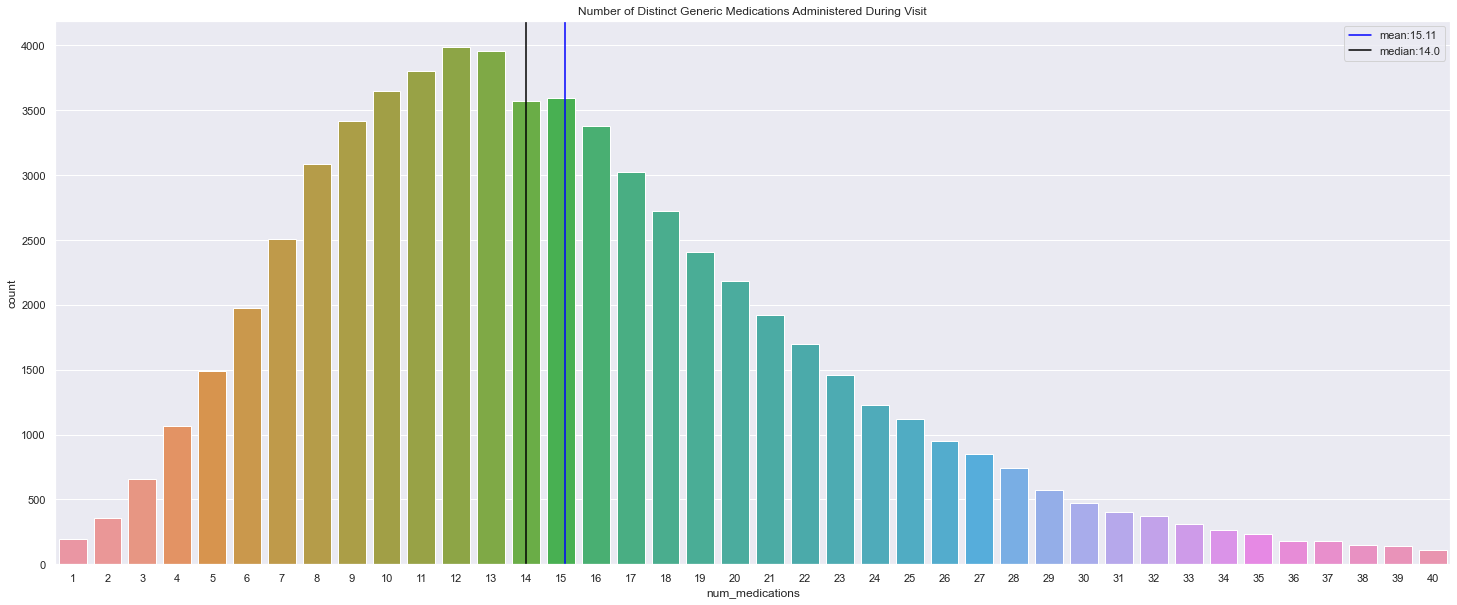

In [31]:
rcParams['figure.figsize'] = 25,10
sns.countplot(x='num_medications', data=df)
mean, median = np.mean(df.num_medications), np.median(df.num_medications)
plt.axvline(mean-df.num_medications.min(), color='blue', label=f'mean:{round(mean,2)}')
plt.axvline(median-df.num_medications.min(), color='black', label=f'median:{round(median,2)}')
plt.title('Number of Distinct Generic Medications Administered During Visit')
plt.legend()
plt.show()

In [32]:
df.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39063.0,14.833039,7.302302,1.0,10.0,14.0,19.0,40.0
YES,25332.0,15.544568,7.024022,1.0,10.0,15.0,20.0,40.0


> **How many medications are patients receiving during their visit?**

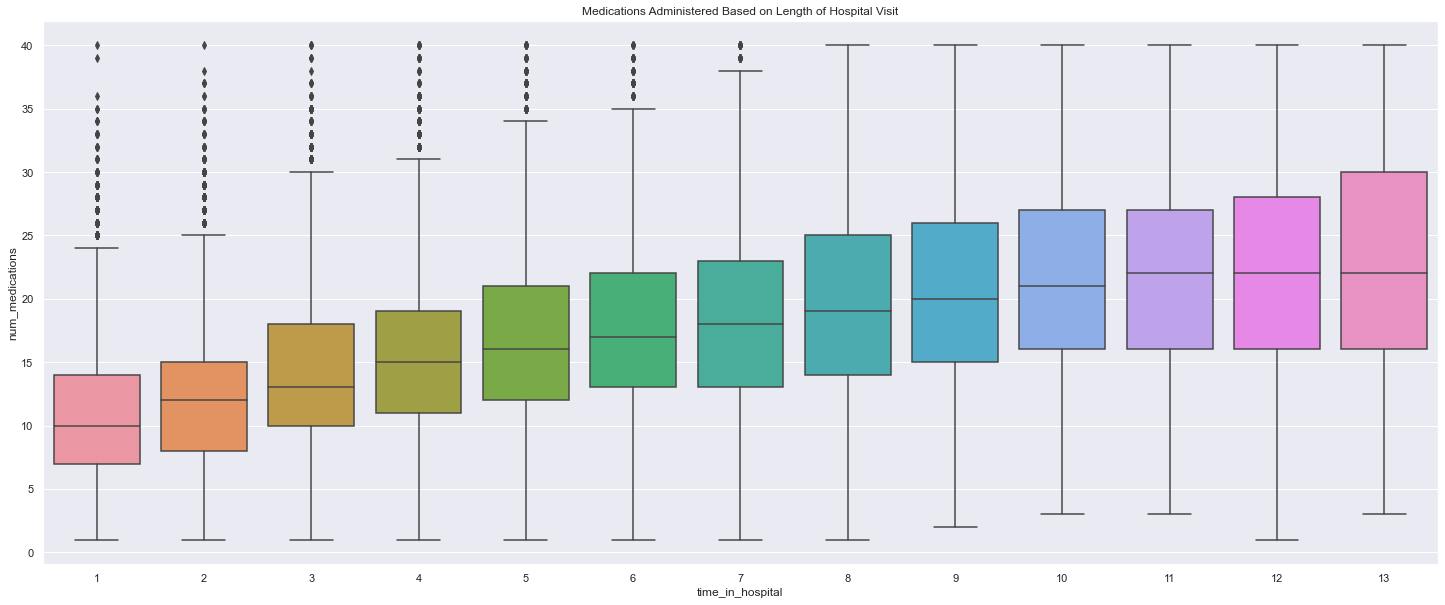

In [33]:
ax = sns.boxplot(x='time_in_hospital', y='num_medications', data=df)
# box_labels(ax, df.sort_values('time_in_hospital'),'time_in_hospital','num_medications')
plt.title('Medications Administered Based on Length of Hospital Visit')
plt.show()

> Patients who spend more time in the hospital receive more medications, but there are a few that receive over 60 different kinds of medications.

> **How many medications are patients receiving during their visit?**

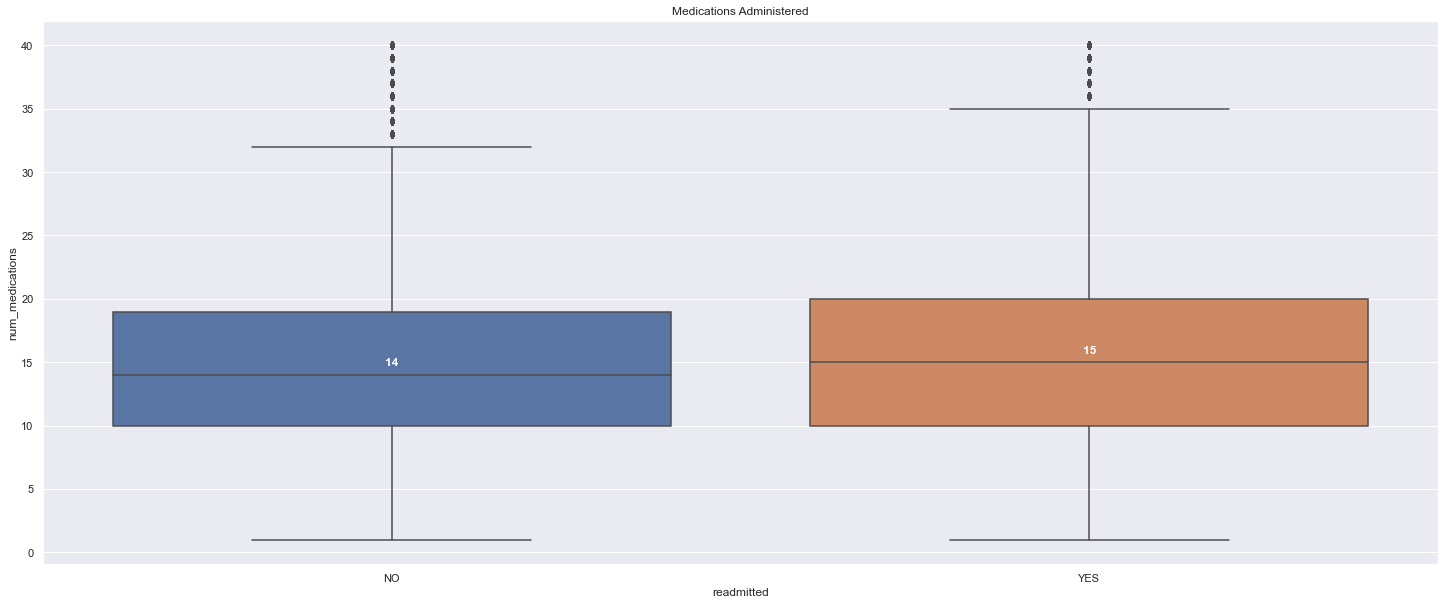

In [34]:
ax = sns.boxplot(x='readmitted', y='num_medications', data=df.sort_values('readmitted'))
box_labels(ax, df.sort_values('readmitted'),'readmitted','num_medications')
plt.title('Medications Administered')
plt.show()

> The distribution is almost equal for readmitted and not readmitted patients, with readmits being slightly higher on average.

### FOCUS ON "`number of outpatient`" visits

In [35]:
info('number_outpatient')

NUMBER_OUTPATIENT : Number of outpatient visits of the patient in the year preceding the encounter



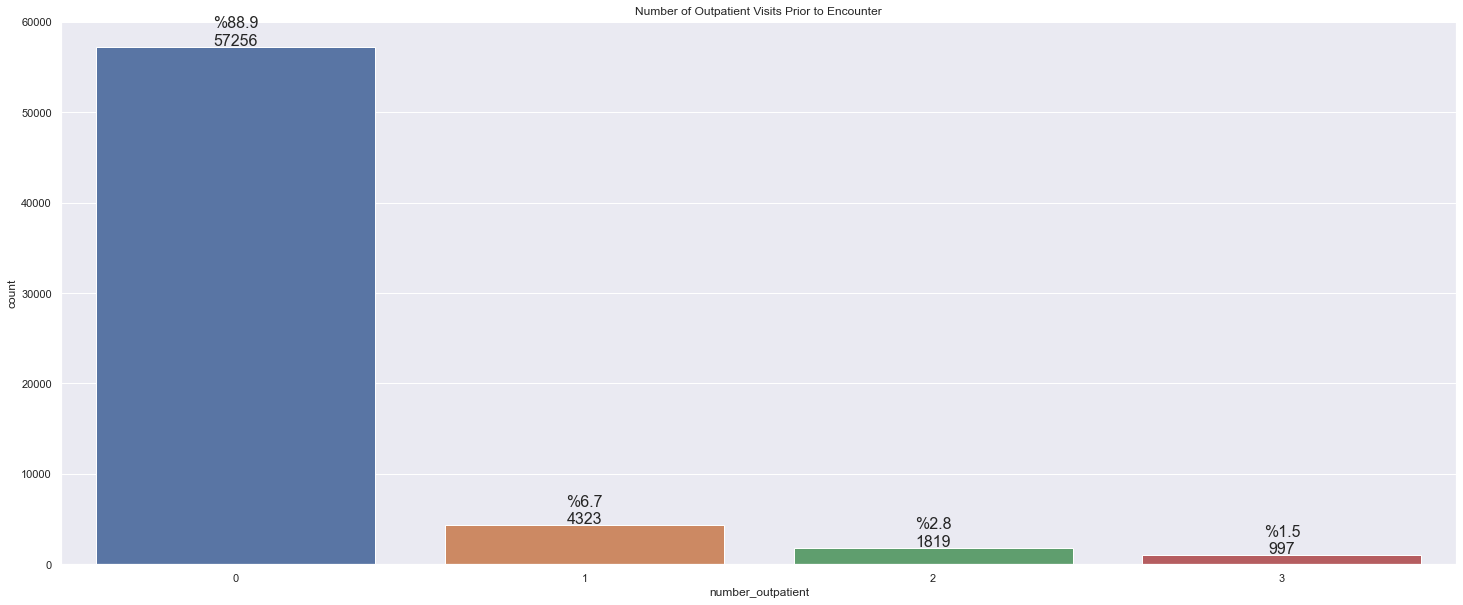

In [36]:
def labels(ax):
    for bar in ax.patches: 
        ax.annotate('%{:.1f}\n{:.0f}'.format(100*bar.get_height()/len(df),bar.get_height()), (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()+750), ha='center', va='center', 
                       size=16, xytext=(0, 8), 
                       textcoords='offset points') 
        
ax = sns.countplot(x='number_outpatient',data=df)
labels(ax)
plt.title('Number of Outpatient Visits Prior to Encounter')
plt.show()

In [37]:
# outpatient visit stats
df.groupby('readmitted')['number_outpatient'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39063.0,0.143128,0.499008,0.0,0.0,0.0,0.0,3.0
YES,25332.0,0.211630,0.593094,0.0,0.0,0.0,0.0,3.0


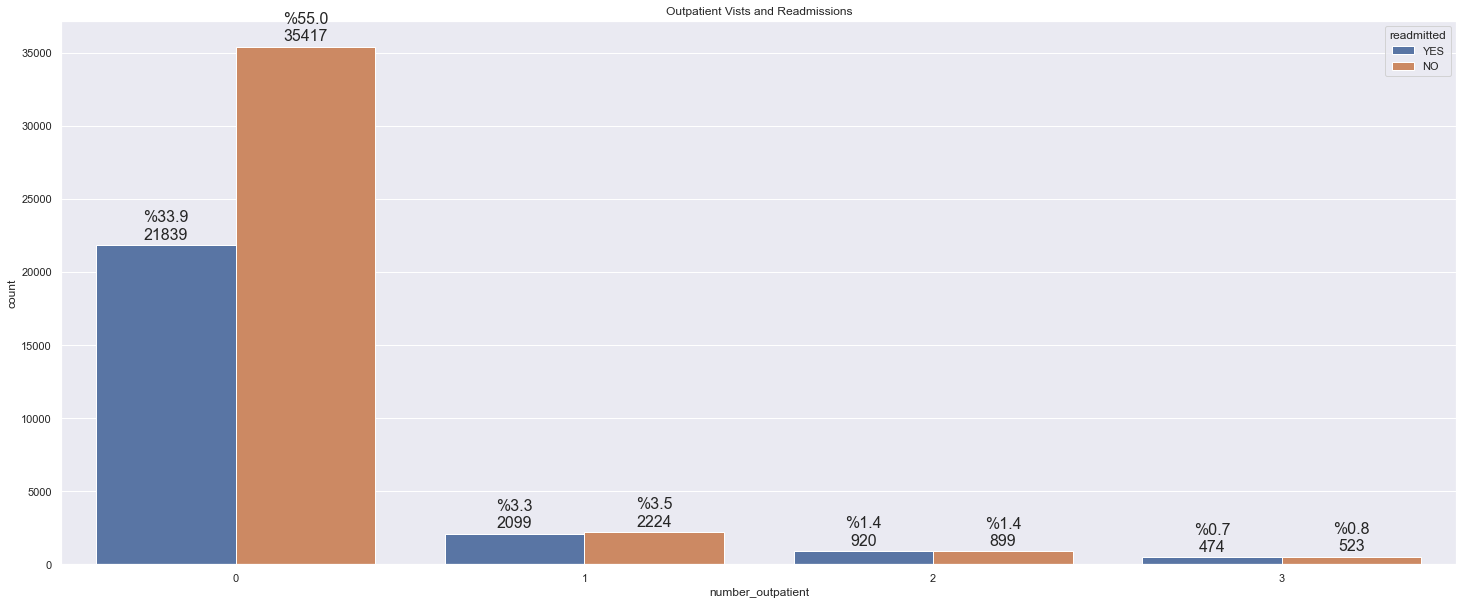

In [38]:
# outpatient vists and readmissions
ax = sns.countplot(x='number_outpatient',data=df, hue='readmitted')
labels(ax)
plt.title('Outpatient Vists and Readmissions')
plt.show()

In [39]:
pd.crosstab(df.readmitted, df.number_outpatient, margins=True, margins_name='Total')

number_outpatient,0,1,2,3,Total
readmitted,,,,,
NO,35417,2224,899,523,39063
YES,21839,2099,920,474,25332
Total,57256,4323,1819,997,64395


> Most patients did not have any outpatient visits prior to the recorded one.

### FOCUS ON "`number of emergency`" visits

In [41]:
info('number_emergency')

NUMBER_EMERGENCY : Number of emergency visits of the patient in the year preceding the encounter



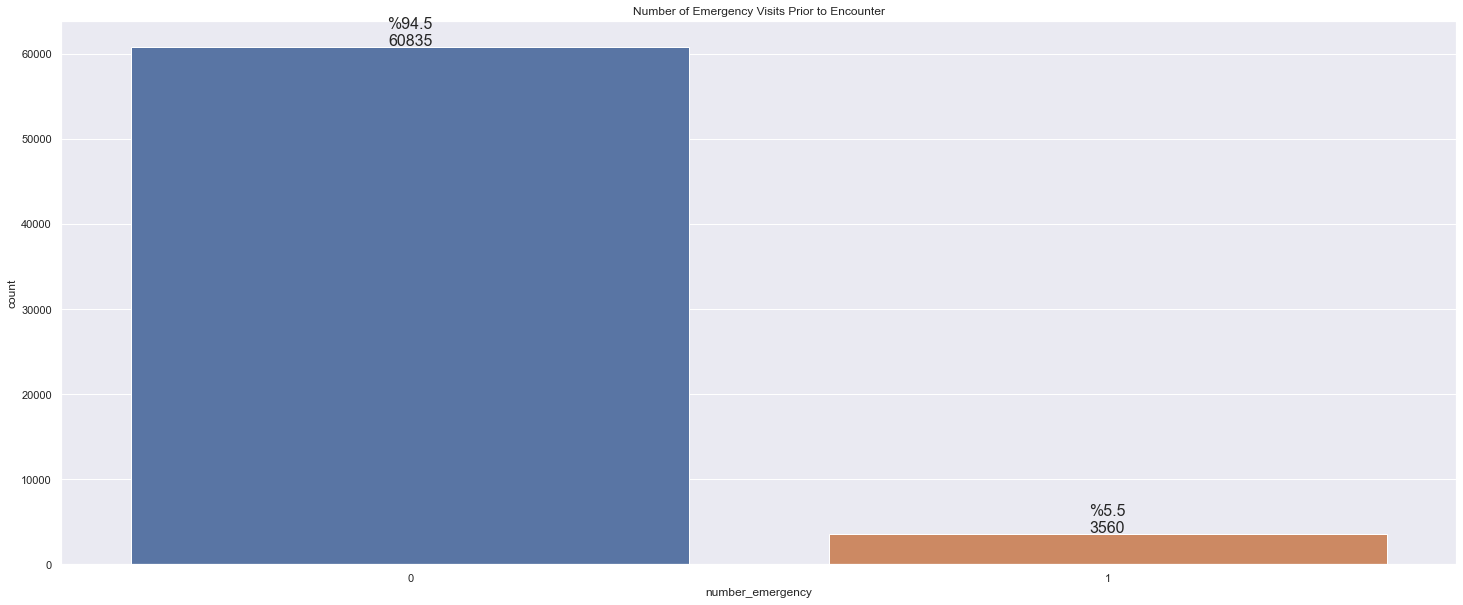

In [42]:
# plt.figure(figsize=(20,5))
ax = sns.countplot(x='number_emergency', data=df)
labels(ax)
plt.title('Number of Emergency Visits Prior to Encounter')
plt.show()

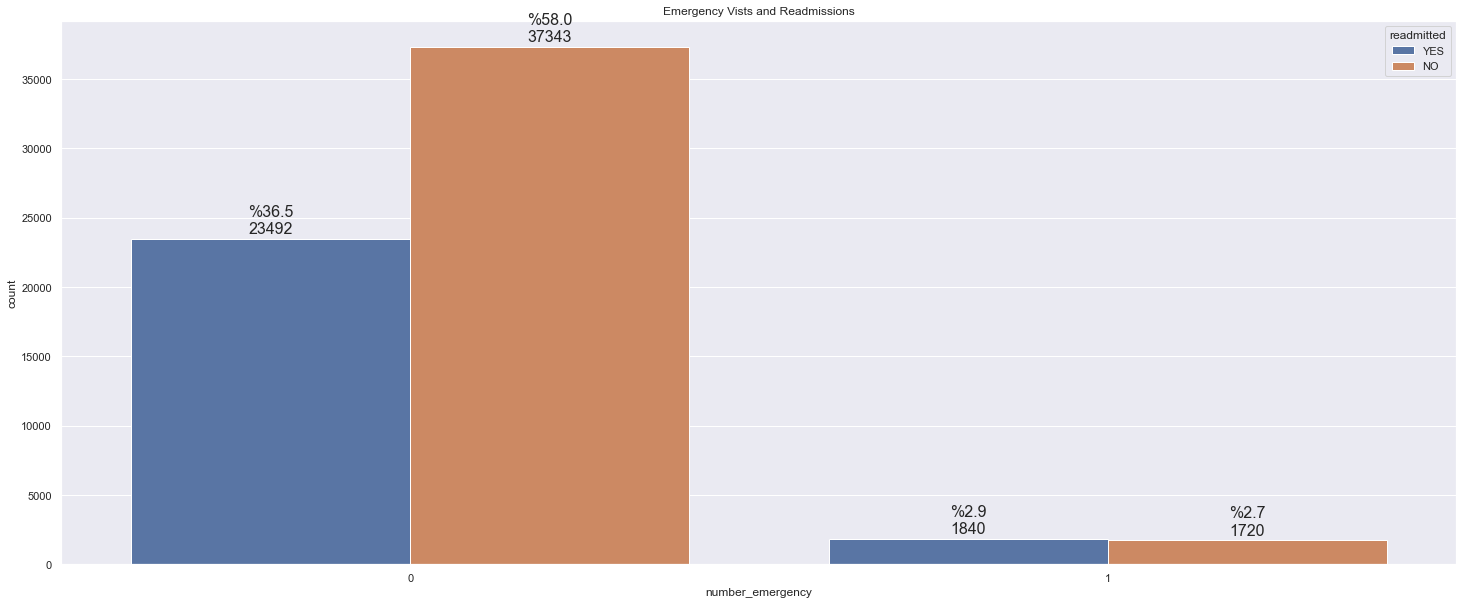

In [44]:
# emergency vists and readmissions
ax = sns.countplot(x='number_emergency', hue='readmitted', data=df)
labels(ax)
plt.title('Emergency Vists and Readmissions')
plt.show()

> Most patients did not visit the emergency room prior to their recorded visit.

In [45]:
pd.crosstab(df.readmitted, df.number_emergency, margins=True, margins_name='Total')

number_emergency,0,1,Total
readmitted,,,
NO,37343,1720,39063
YES,23492,1840,25332
Total,60835,3560,64395


> **How many emergency visits did patients have prior to this visit?**

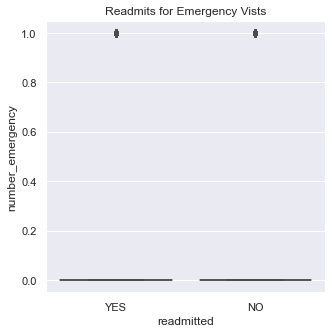

In [46]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='readmitted', y='number_emergency', data=df)
plt.title('Readmits for Emergency Vists')
plt.show()

### FOCUS ON "`number of inpatient`" visits

In [14]:
info('number_inpatient') # onceki yildaki yatarak tedavi sayisi

NUMBER_INPATIENT : Number of inpatient visits of the patient in the year preceding the encounter



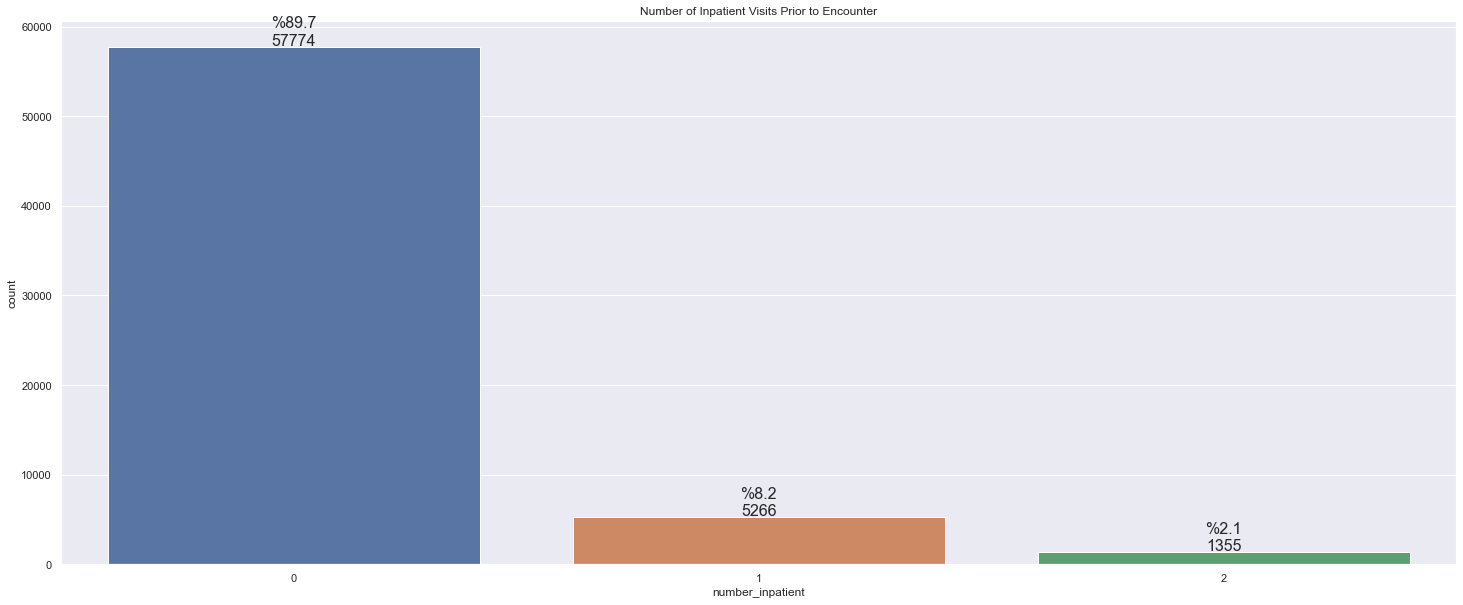

In [47]:
ax = sns.countplot(x='number_inpatient',data=df)
labels(ax)
plt.title('Number of Inpatient Visits Prior to Encounter')
plt.show()

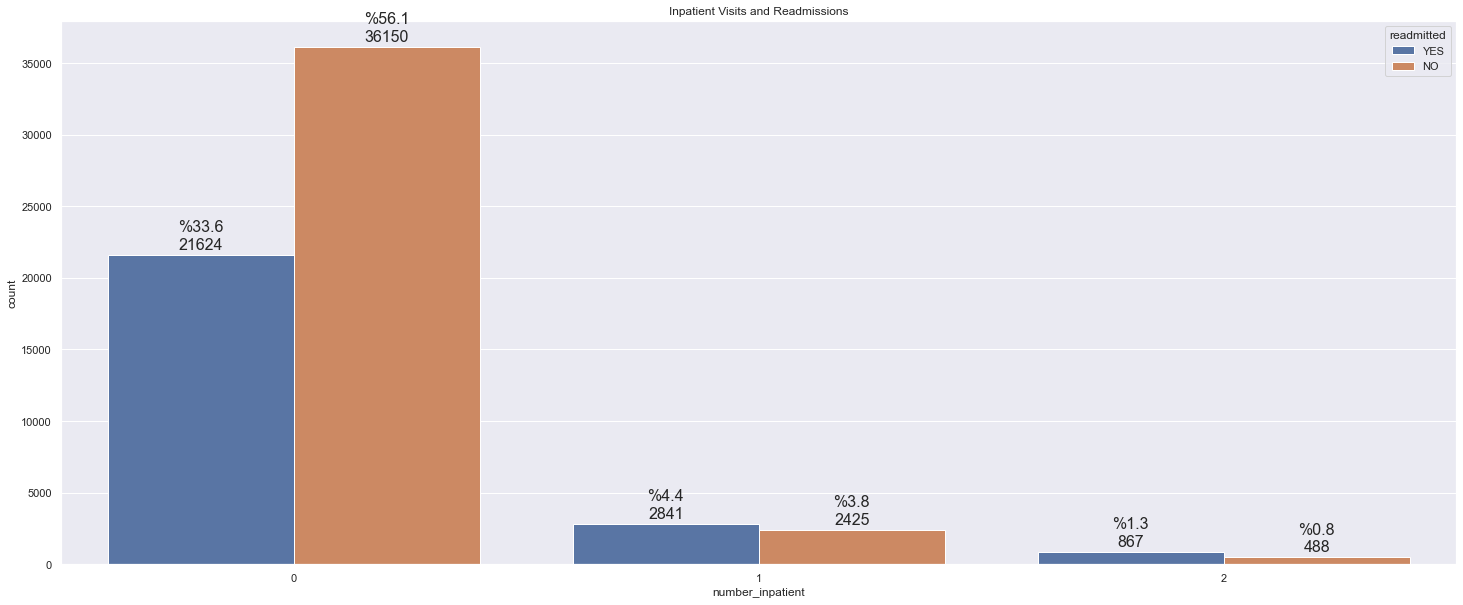

In [49]:
# inpatient visits and readmissions
ax = sns.countplot(x='number_inpatient', hue='readmitted',data=df)
labels(ax)
plt.title('Inpatient Visits and Readmissions')
plt.show()

> Inpatient visits are not common for most patients prior to this visit.

In [50]:
pd.crosstab(df.readmitted, df.number_inpatient, margins=True, margins_name='Total')

number_inpatient,0,1,2,Total
readmitted,,,,
NO,36150,2425,488,39063
YES,21624,2841,867,25332
Total,57774,5266,1355,64395


### FOCUS ON "`number of diagnoses`"

In [52]:
info('number_diagnoses')

NUMBER_DIAGNOSES : Number of diagnoses entered to the system



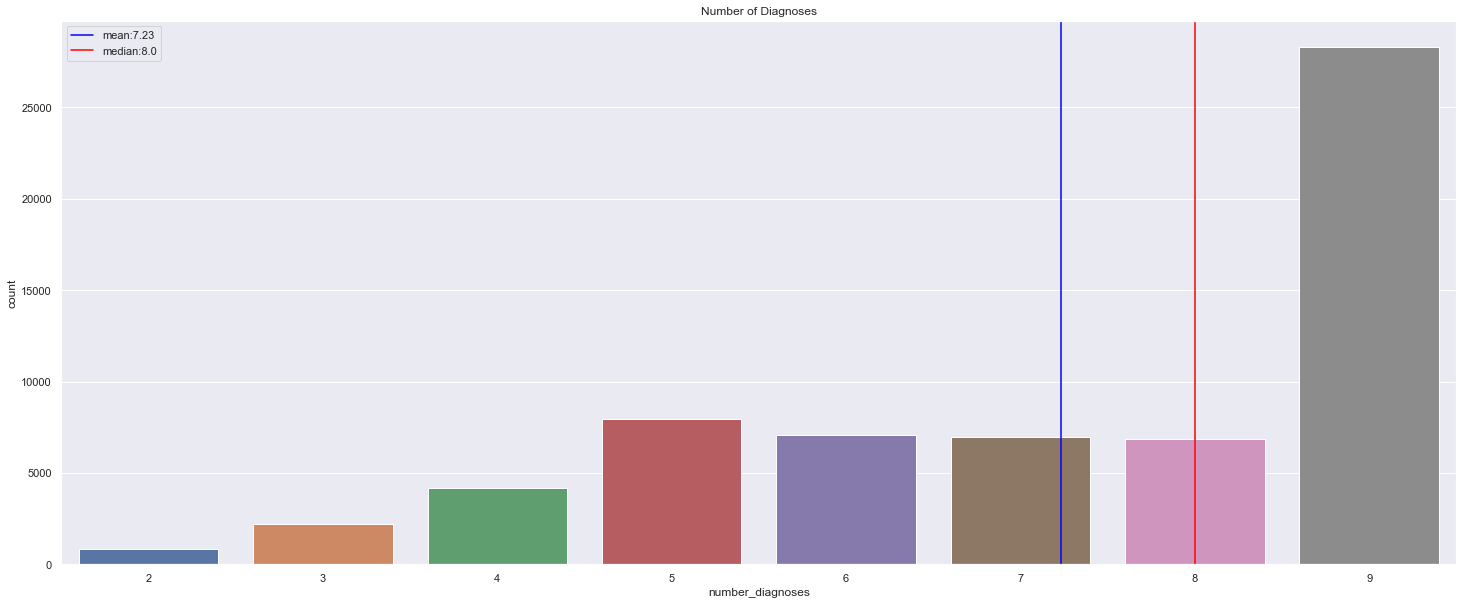

In [53]:
ax = sns.countplot(x='number_diagnoses',data=df)
mean, median = np.mean(df.number_diagnoses), np.median(df.number_diagnoses)
plt.axvline(mean-df.number_diagnoses.min(), color='blue', label=f'mean:{round(mean,2)}')
plt.axvline(median-df.number_diagnoses.min(), color='red', label=f'median:{round(median,2)}')
plt.title('Number of Diagnoses')
plt.legend()
plt.show()

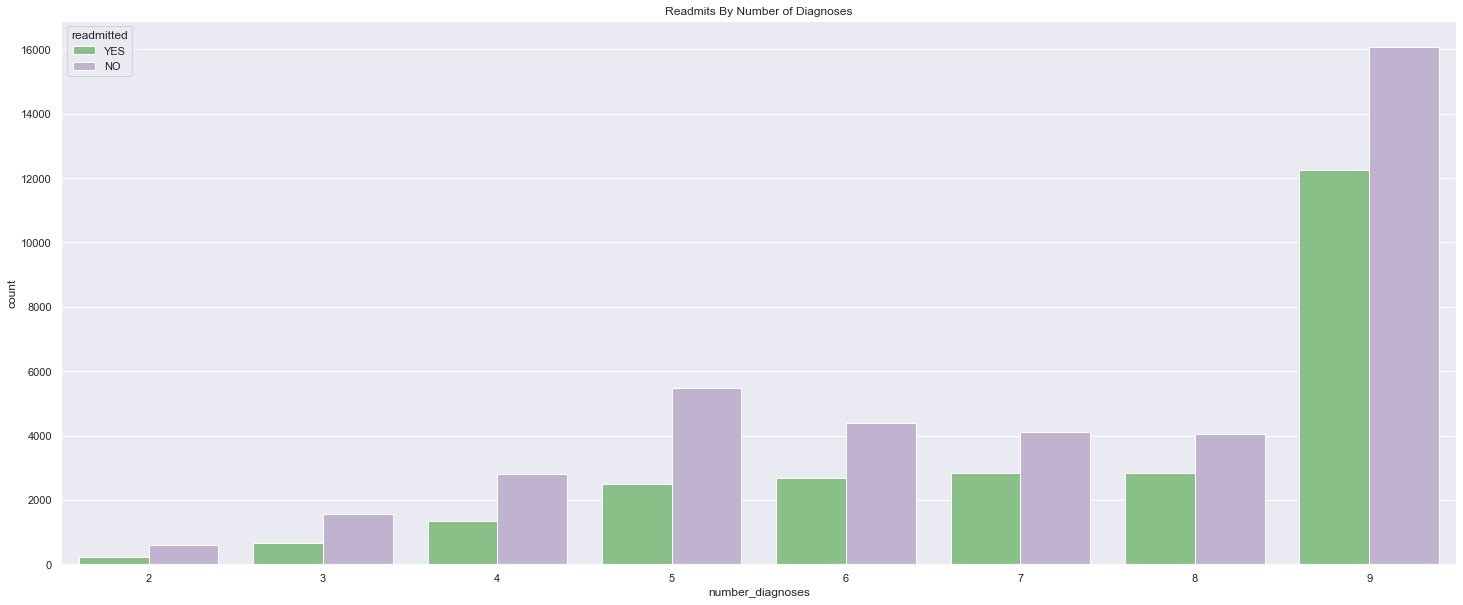

In [54]:
# number of diagnoses and readmit rate
ax = sns.countplot(x='number_diagnoses', hue='readmitted', palette='Accent', data=df)
# labels(ax)
plt.title('Readmits By Number of Diagnoses')
plt.show()

In [55]:
pd.DataFrame(df.number_diagnoses.describe()).T.round(2)

,count,mean,std,min,25%,50%,75%,max
number_diagnoses,64395.0,7.23,1.97,2.0,6.0,8.0,9.0,9.0


In [56]:
df.groupby('readmitted')['number_diagnoses'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
NO,39063.0,7.08,2.02,2.0,5.0,8.0,9.0,9.0
YES,25332.0,7.47,1.86,2.0,6.0,8.0,9.0,9.0


In [57]:
# number of diagnoses
pd.crosstab(df.readmitted, df.number_diagnoses, margins=True, margins_name='Total')

number_diagnoses,2,3,4,5,6,7,8,9,Total
readmitted,,,,,,,,,
NO,588,1567,2816,5466,4399,4106,4035,16086,39063
YES,228,650,1347,2505,2686,2848,2828,12240,25332
Total,816,2217,4163,7971,7085,6954,6863,28326,64395


* Most patients have up to nine diagnosed conditions during their visit, after that, only a handful have more than nine in one visit. 
* Readmitted patients tend to have more diagnosed conditions but their average is only slightly higher than those not readmitted.

> **How many diagnoses do readmitted patients have?**

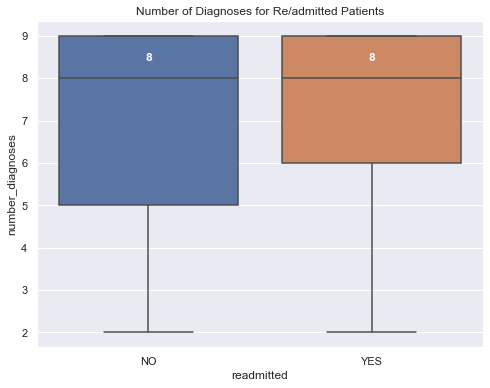

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='readmitted', y='number_diagnoses', data=df.sort_values('readmitted'))
box_labels(ax, df.sort_values('readmitted'),'readmitted','number_diagnoses')
plt.title('Number of Diagnoses for Re/admitted Patients')
plt.show()

# FOCUS ON "`glucose serum test results`"

In [59]:
info('max_glu_serum')

MAX_GLU_SERUM : Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured



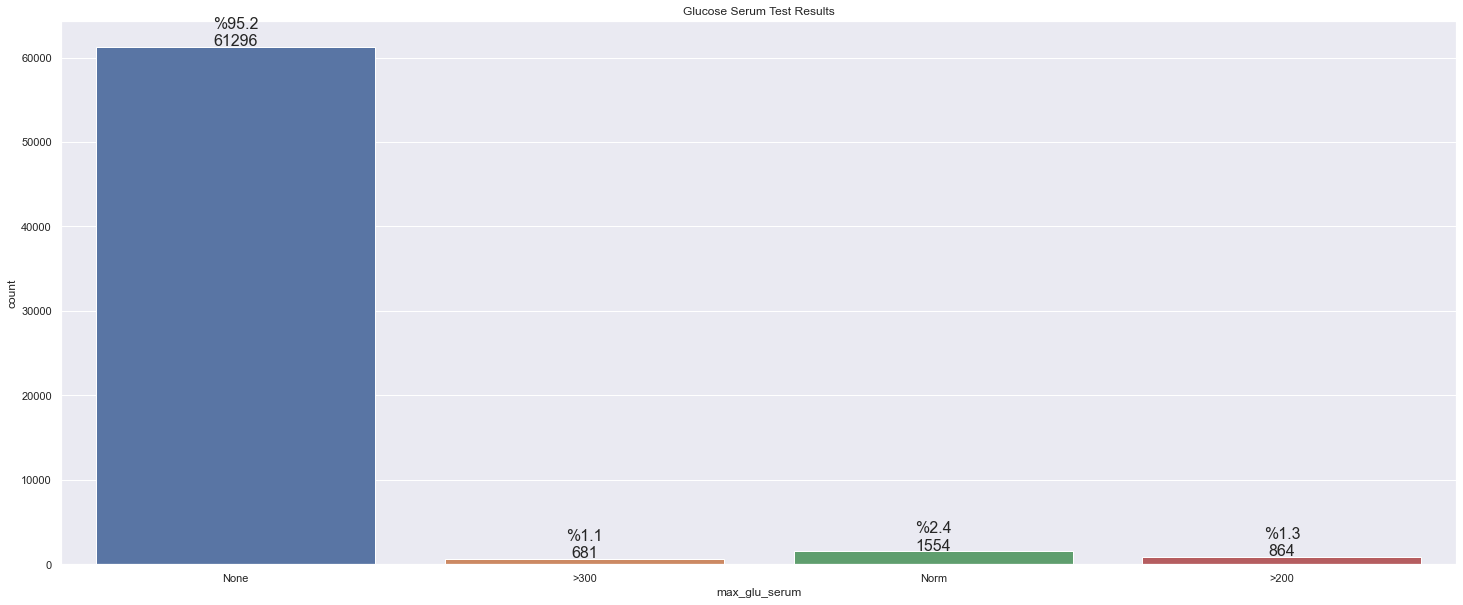

In [60]:
ax = sns.countplot(x='max_glu_serum', data=df)
labels(ax)
plt.title('Glucose Serum Test Results')
plt.show()

> Since the majority of patients do not have a glucose reading, they will be excluded for the next graph in order to show the readmit rates for patients who do have a reading.

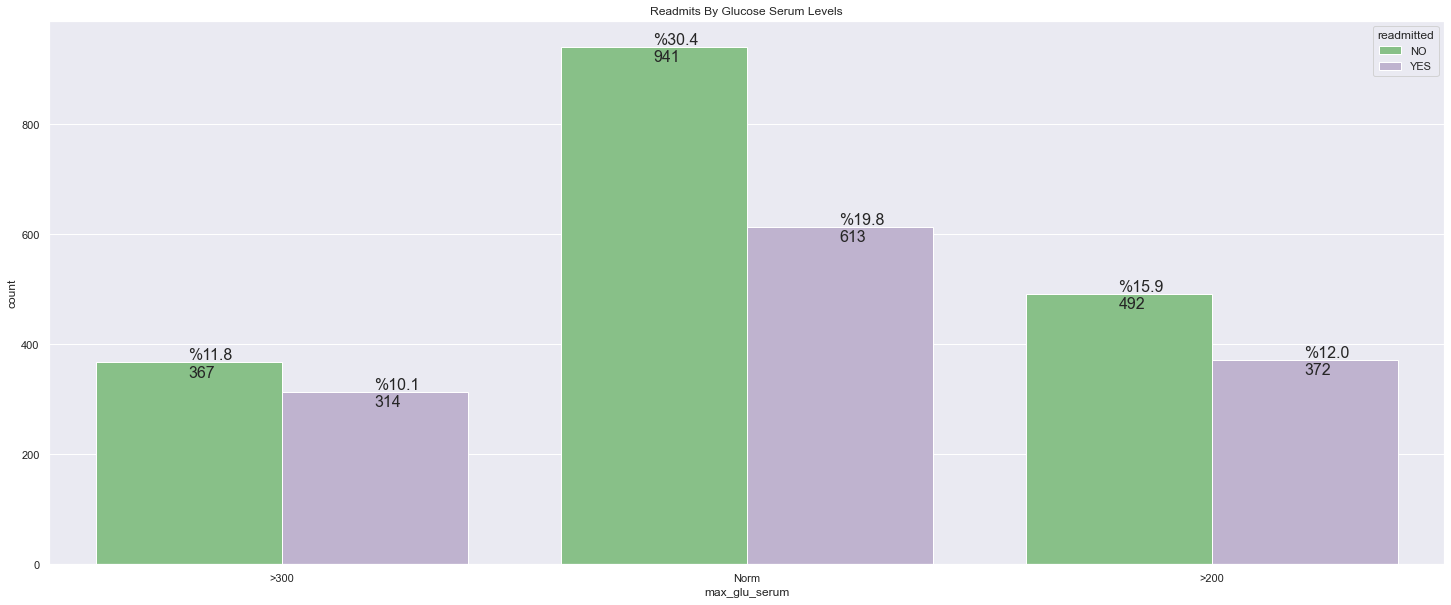

In [61]:
def labels(ax, df=df):
    for p in ax.patches:
            ax.annotate('%{:.1f}\n{:.0f}'.format(100*p.get_height()/len(df),p.get_height()), 
                        (p.get_x()+0.2, p.get_height()-27),size=16)

# exclude patients without a glucose reading
glucose_none = df[df.max_glu_serum != 'None']

# glucose serum results and readmit impact
ax = sns.countplot(x='max_glu_serum', hue='readmitted', palette='Accent', data=glucose_none)
labels(ax,glucose_none)
plt.title('Readmits By Glucose Serum Levels')
plt.show()

Patients with a glucose serum reading of over 300 have a 50-50 chance of being readmitted. High blood sugar levels are often dangerous for older patients due to the medical complications involved, so it's understandable that more patients return to the hospital for additional care.

In [62]:

pd.crosstab(df.readmitted, df.max_glu_serum, margins=True, margins_name='Total')

max_glu_serum,>200,>300,None,Norm,Total
readmitted,,,,,
NO,492,367,37263,941,39063
YES,372,314,24033,613,25332
Total,864,681,61296,1554,64395


### FOCUS ON "`A1C results`"

In [63]:
info('A1Cresult')

A1CRESULT : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.



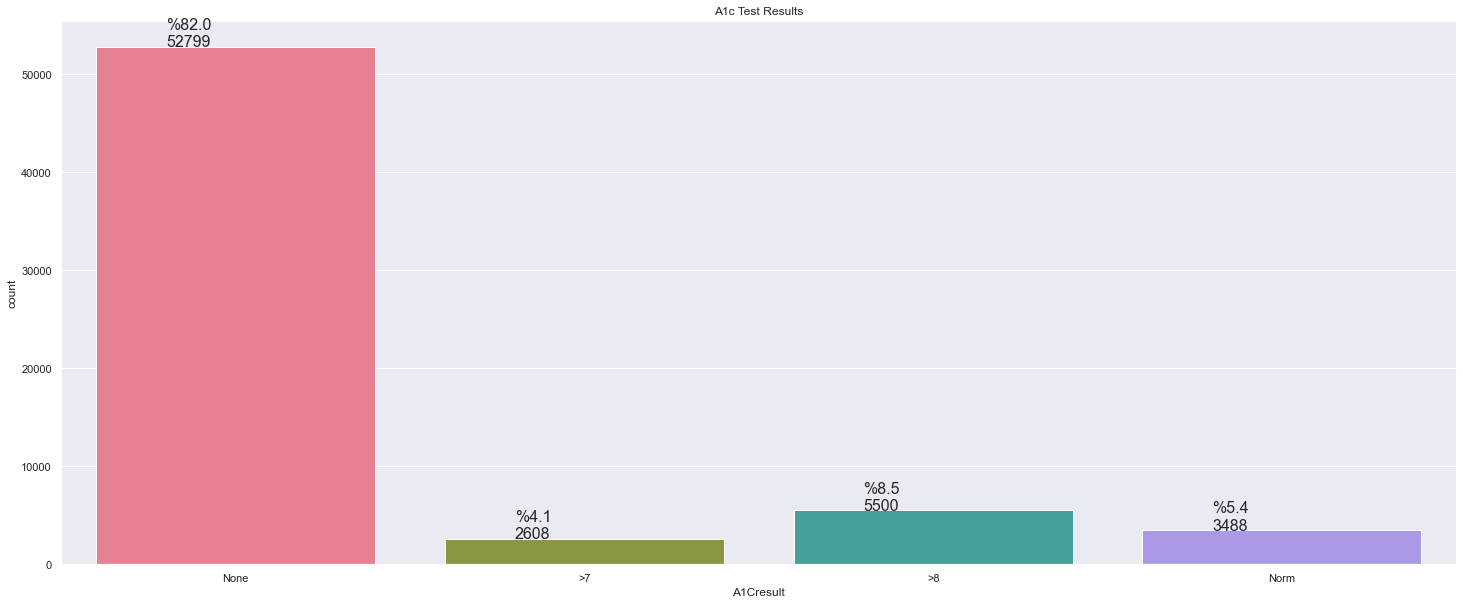

In [64]:
ax = sns.countplot(x='A1Cresult', palette='husl', data=df)
labels(ax)
plt.title('A1c Test Results')
plt.show()

* Similar to the glucose reading, the majority of patients also do not have a HbA1c test reading. 
* In order to understand the impact of A1c tests on readmit rates, patients without a reading will be excluded in the graph below.

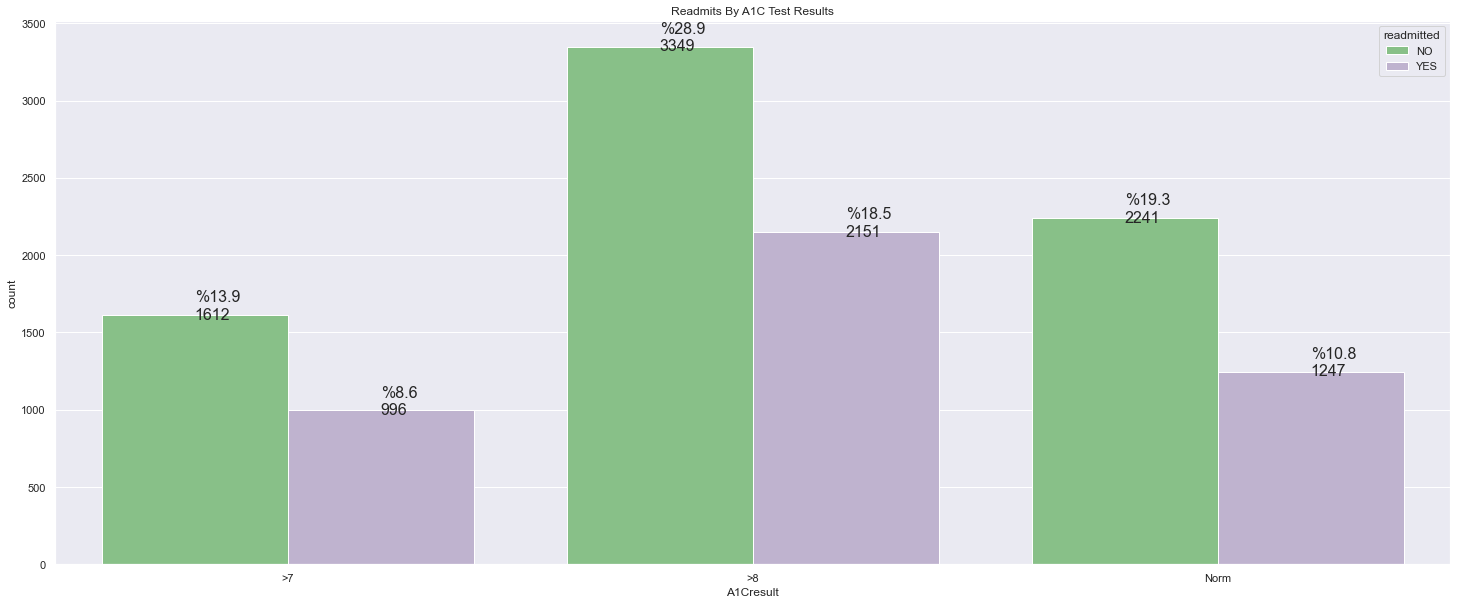

In [65]:
# exclude patients without an A1C reading
alc_none = df[df.A1Cresult != 'None']

# A1C results and readmit impact
ax = sns.countplot(x='A1Cresult', hue='readmitted', palette='Accent', data=alc_none)
labels(ax, alc_none)
plt.title('Readmits By A1C Test Results')
plt.show()

In [66]:
pd.crosstab(df.readmitted, df.A1Cresult, margins=True, margins_name='Total')

A1Cresult,>7,>8,None,Norm,Total
readmitted,,,,,
NO,1612,3349,31861,2241,39063
YES,996,2151,20938,1247,25332
Total,2608,5500,52799,3488,64395


### FOCUS ON "`change`" column

In [67]:
info('change')

CHANGE : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”



## change in medications, dosage or brand

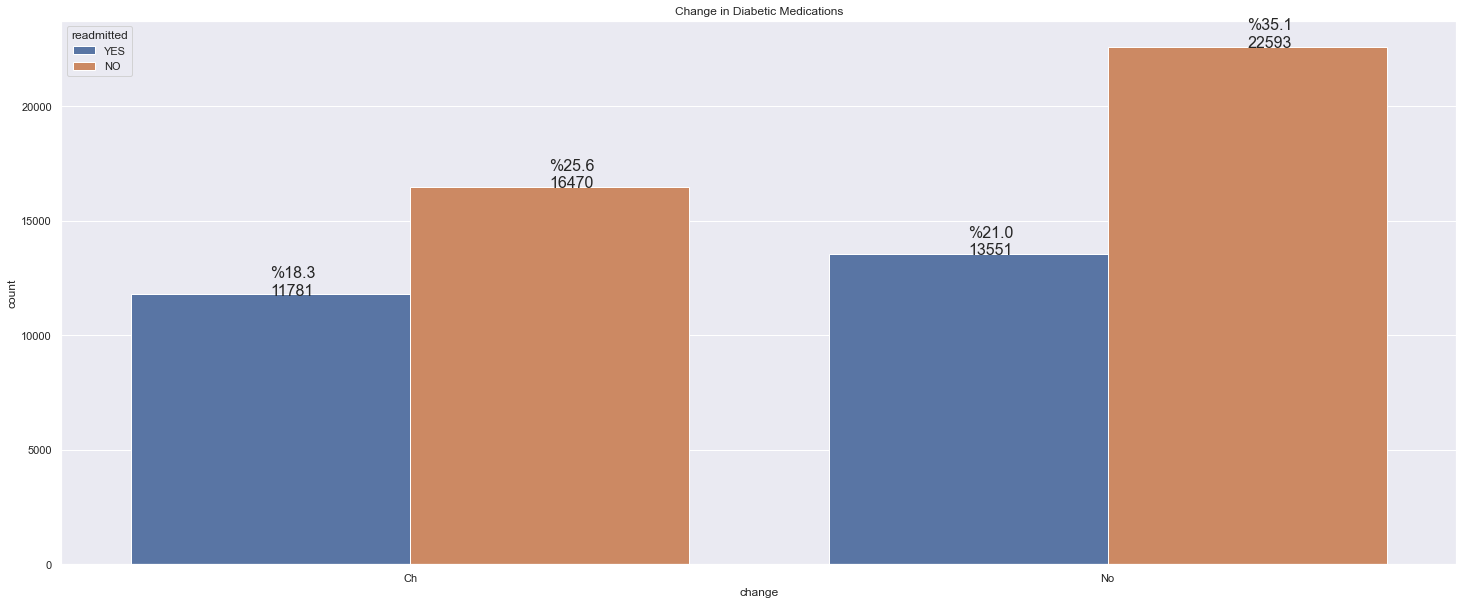

In [68]:
# change in medications
ax = sns.countplot(x='change', hue='readmitted', data=df)
labels(ax)
plt.title('Change in Diabetic Medications')
plt.show()

In [69]:
pd.crosstab(df.change, df.readmitted, margins=True, margins_name='Total')

readmitted,NO,YES,Total
change,,,
Ch,16470,11781,28251
No,22593,13551,36144
Total,39063,25332,64395


> **who is likely to have a change in medication?**

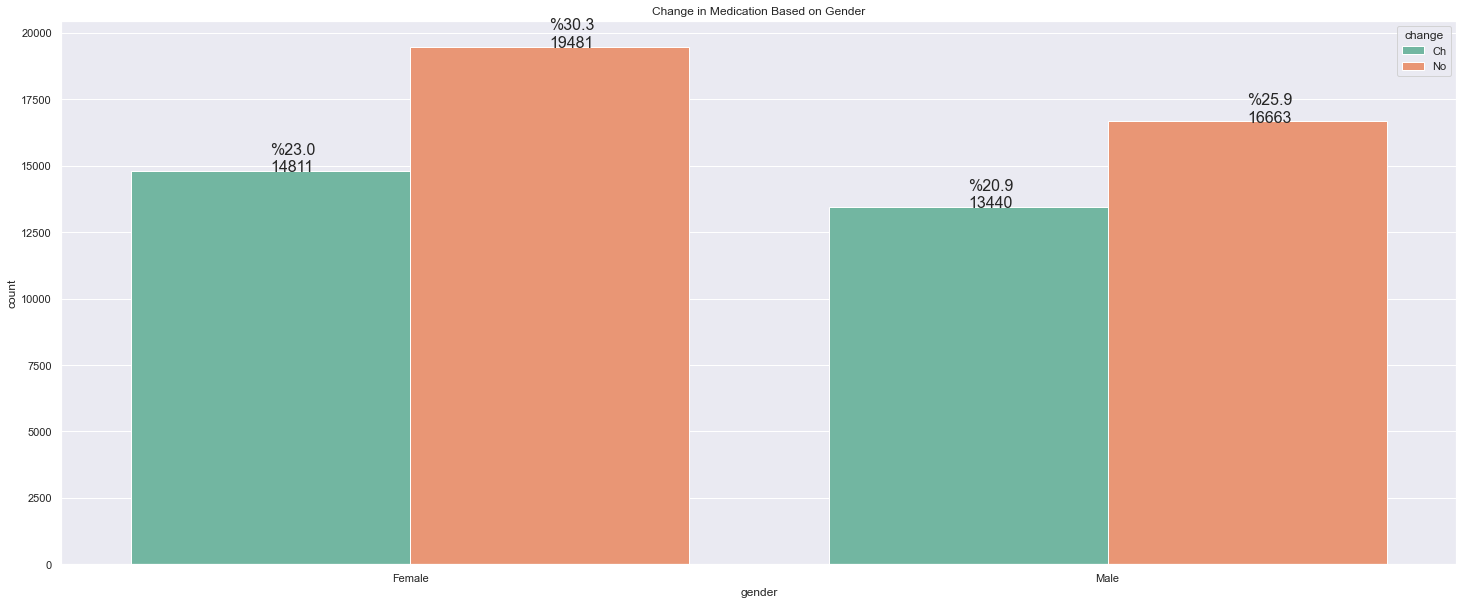

In [70]:
ax = sns.countplot(x='gender', hue='change', palette='Set2', data=df)
labels(ax)
plt.title('Change in Medication Based on Gender')
plt.show()

In [71]:
pd.crosstab(df.gender, df.change, margins=True, margins_name='Total')

change,Ch,No,Total
gender,,,
Female,14811,19481,34292
Male,13440,16663,30103
Total,28251,36144,64395


### FOCUS ON "`diabetesMed`"

In [72]:
info('diabetesMed')

DIABETESMED : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”



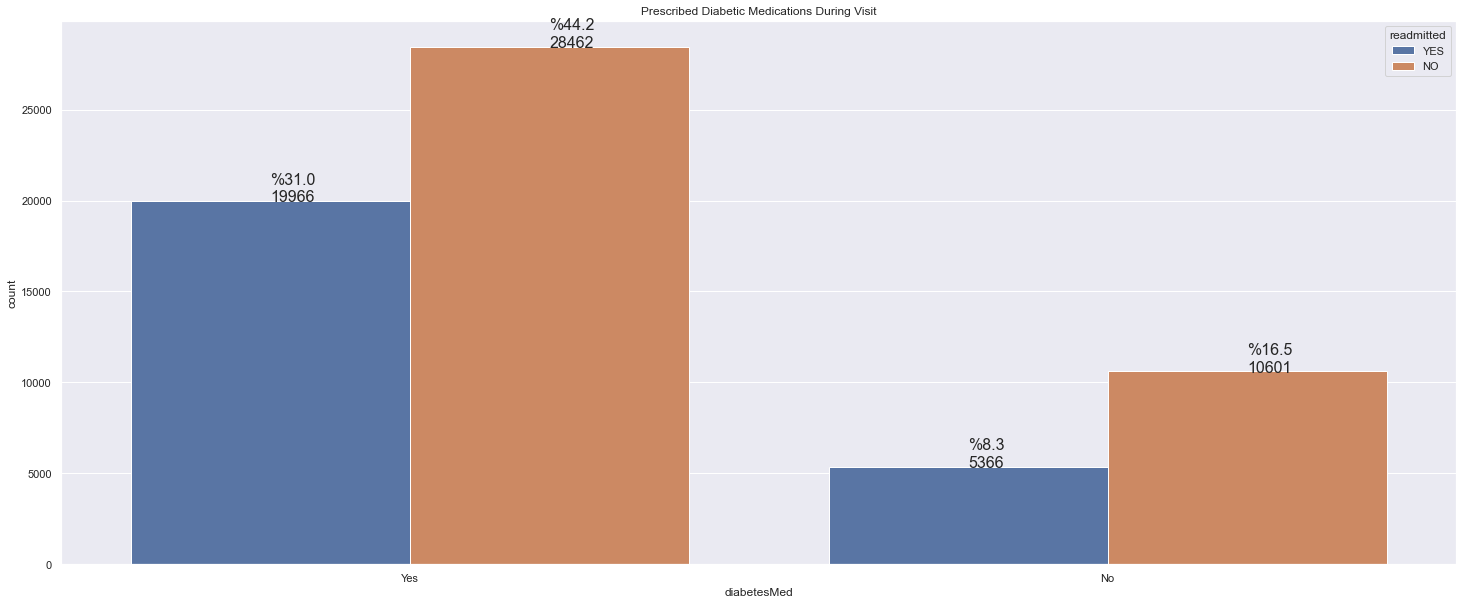

In [73]:
ax = sns.countplot(x='diabetesMed', hue='readmitted', data=df)
labels(ax)
plt.title('Prescribed Diabetic Medications During Visit')
plt.show()

In [74]:
pd.crosstab(df.diabetesMed, df.readmitted, margins=True, margins_name='Total')

readmitted,NO,YES,Total
diabetesMed,,,
No,10601,5366,15967
Yes,28462,19966,48428
Total,39063,25332,64395


> **Who is likely or not likely to have a change in medication?**

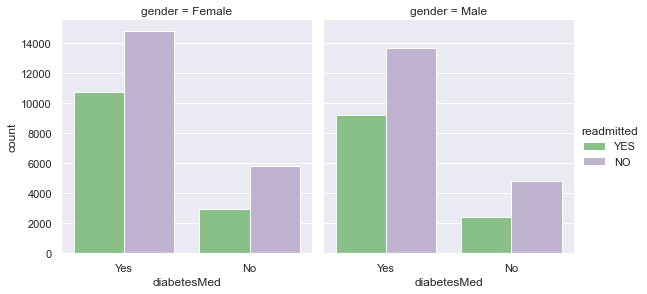

In [75]:
sns.catplot(x='diabetesMed', hue='readmitted', col='gender', palette='Accent', data=df, kind='count', height=4, aspect=1)
plt.show()

### medications used by patients

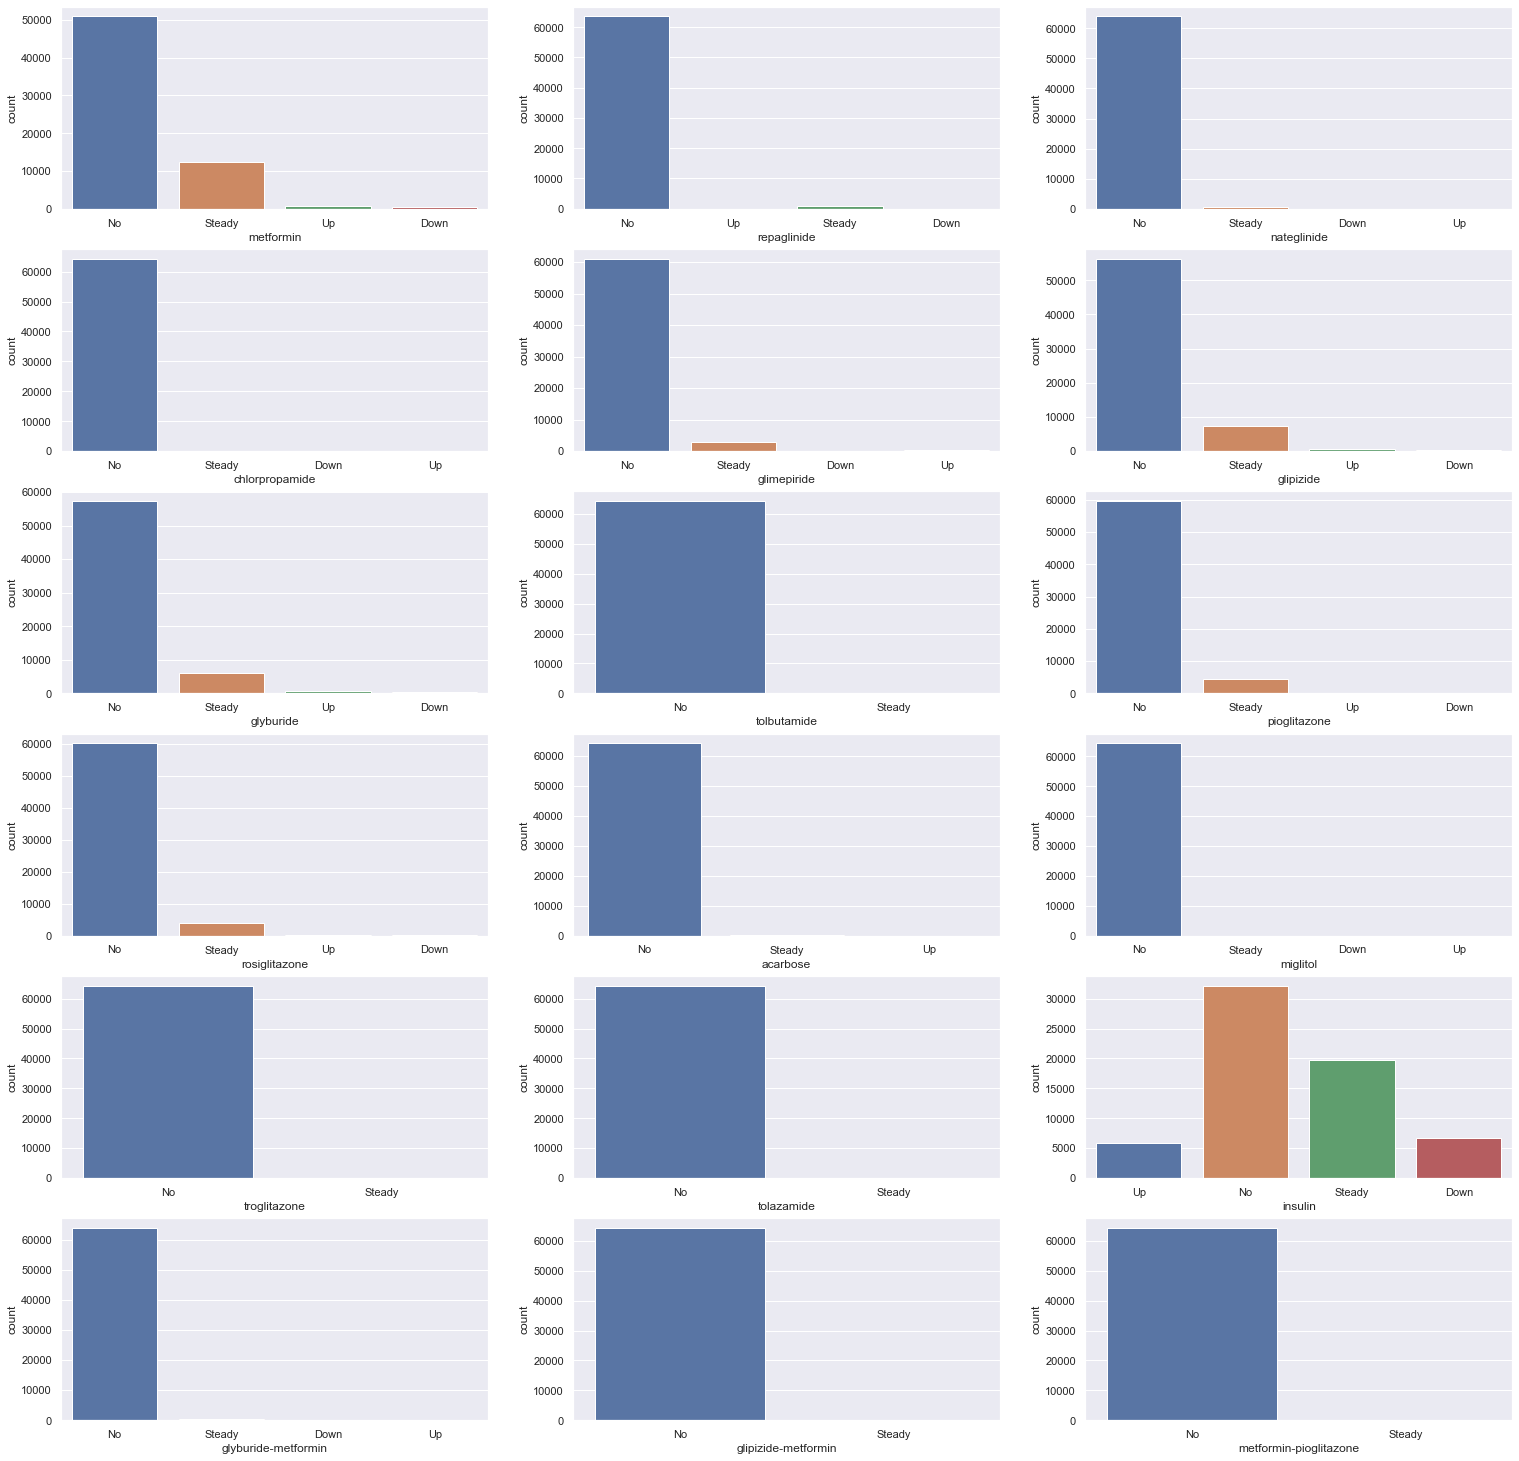

In [76]:
columns=['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'metformin-pioglitazone']

plt.figure(figsize=(26, 26))
for i,col in enumerate(columns):
    plt.subplot(6,3,i+1)
    sns.countplot(x=df[col])

> Dosages for insulin shows the most activity out of all diabetic medications, most of which aren't prescribed to patients.

In [15]:
info('insulin')

INSULIN : Indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed



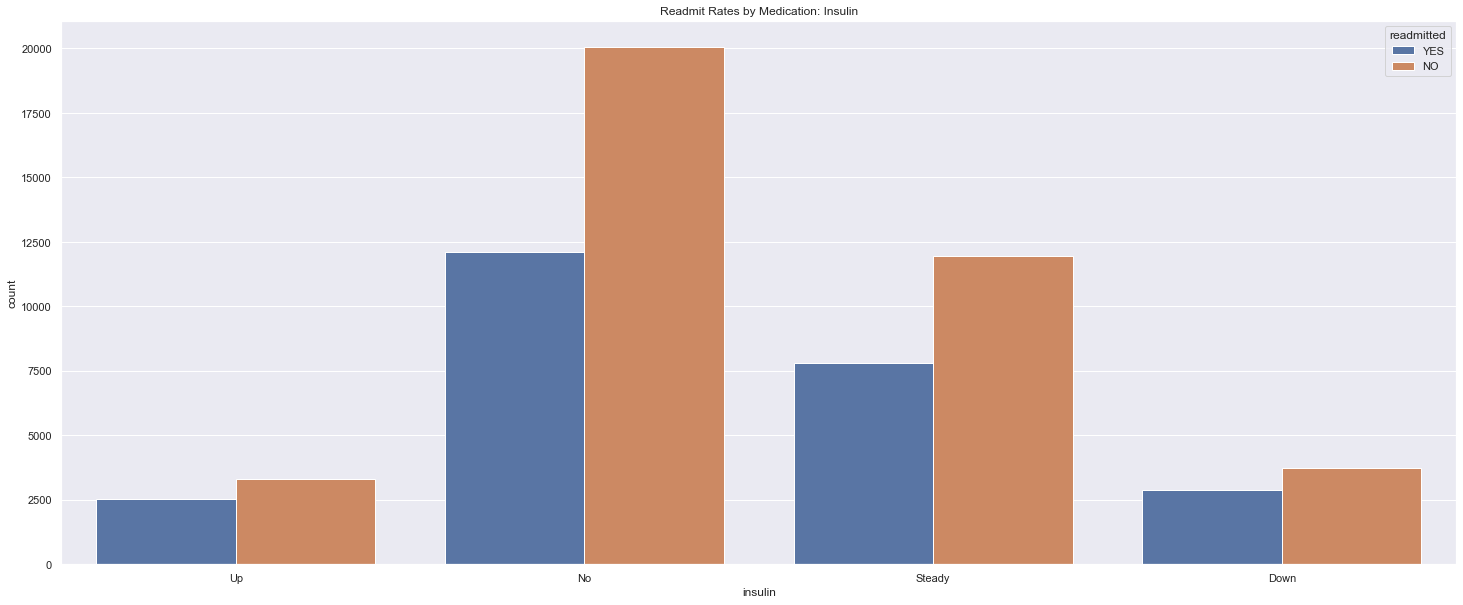

In [77]:
sns.countplot(x='insulin', hue='readmitted', data=df)
plt.title('Readmit Rates by Medication: Insulin')
plt.show()